In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import psycopg2 # needed to get database exception errors when uploading dataframe
import requests # package for getting data from the web
from scipy.stats import ttest_ind # statical test ttest and p test
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import statsmodels.api as sm
import scipy.stats as stats


In [9]:
heart = pd.read_csv("data/heart_attack.csv")
heart.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [10]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [11]:
heart.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [12]:
heart.columns = heart.columns.str.lower().str.replace(' ','_')


In [13]:
heart.columns

Index(['patient_id', 'age', 'sex', 'cholesterol', 'blood_pressure',
       'heart_rate', 'diabetes', 'family_history', 'smoking', 'obesity',
       'alcohol_consumption', 'exercise_hours_per_week', 'diet',
       'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides',
       'physical_activity_days_per_week', 'sleep_hours_per_day', 'country',
       'continent', 'hemisphere', 'heart_attack_risk'],
      dtype='object')

In [14]:
wlb = pd.read_csv("data/work_life_balance.csv")
wlb.head()

,2022,2021,City,Country,Remote Jobs,Overworked Population,Minimum Vacations Offered (Days),Vacations Taken (Days),Unemployment,Multiple Jobholders,...,Healthcare,Access to Mental Healthcare,Inclusivity & Tolerance,Affordability,"Happiness, Culture & Leisure",City Safety,Outdoor Spaces,Air Quality,Wellness and Fitness,TOTAL SCORE
0,1,2,Oslo,Norway,41.72%,11.20%,25,25,94.7,9.10%,...,100.0,85.0,93.2,59.4,88.8,86.5,95.6,97.5,65.7,100.00
1,2,-,Bern,Switzerland,44.86%,11.40%,20,25,99.8,7.60%,...,99.6,78.6,94.6,69.9,100.0,91.8,87.1,100.0,69.1,99.46
2,3,1,Helsinki,Finland,38.92%,12.70%,25,30,89.3,6.30%,...,96.7,73.0,93.9,65.0,96.3,94.9,86.0,97.0,68.3,99.24
3,4,3,Zurich,Switzerland,44.86%,11.90%,20,25,99.2,7.60%,...,99.2,78.6,87.5,71.6,91.5,92.8,84.0,96.2,68.7,96.33
4,5,5,Copenhagen,Denmark,41.42%,10.50%,25,28,94.8,7.60%,...,94.8,77.6,95.2,65.3,92.5,95.7,75.5,95.1,66.3,96.21


In [15]:
wlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   2022                              100 non-null    int64  
 1   2021                              100 non-null    object 
 2   City                              100 non-null    object 
 3   Country                           100 non-null    object 
 4   Remote Jobs                       100 non-null    object 
 5   Overworked Population             100 non-null    object 
 6   Minimum Vacations Offered (Days)  100 non-null    int64  
 7   Vacations Taken (Days)            100 non-null    object 
 8   Unemployment                      100 non-null    float64
 9   Multiple Jobholders               100 non-null    object 
 10  Inflation                         100 non-null    object 
 11  Paid Parental Leave (Days)        100 non-null    object 
 12  Covid Imp

In [16]:
wlb.columns = wlb.columns.str.lower().str.replace(' ','_')

In [17]:
wlb.columns

Index(['2022', '2021', 'city', 'country', 'remote_jobs',
       'overworked_population', 'minimum_vacations_offered_(days)',
       'vacations_taken_(days)', 'unemployment', 'multiple_jobholders',
       'inflation', 'paid_parental_leave_(days)', 'covid_impact',
       'covid_support', 'healthcare', 'access_to_mental_healthcare',
       'inclusivity_&_tolerance', 'affordability',
       'happiness,_culture_&_leisure', 'city_safety', 'outdoor_spaces',
       'air_quality', 'wellness_and_fitness', 'total_score'],
      dtype='object')

In [18]:
#pd.merge(right=df1, left=df2, how='outer', on='species')

df_heart_wlb = heart.merge(wlb, how = 'right', on = 'country')

In [19]:
df_heart_wlb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   patient_id                        11751 non-null  object 
 1   age                               11751 non-null  float64
 2   sex                               11751 non-null  object 
 3   cholesterol                       11751 non-null  float64
 4   blood_pressure                    11751 non-null  object 
 5   heart_rate                        11751 non-null  float64
 6   diabetes                          11751 non-null  float64
 7   family_history                    11751 non-null  float64
 8   smoking                           11751 non-null  float64
 9   obesity                           11751 non-null  float64
 10  alcohol_consumption               11751 non-null  float64
 11  exercise_hours_per_week           11751 non-null  float64
 12  diet

In [20]:
df_heart_wlb.isnull().sum()

patient_id                          74
age                                 74
sex                                 74
cholesterol                         74
blood_pressure                      74
heart_rate                          74
diabetes                            74
family_history                      74
smoking                             74
obesity                             74
alcohol_consumption                 74
exercise_hours_per_week             74
diet                                74
previous_heart_problems             74
medication_use                      74
stress_level                        74
sedentary_hours_per_day             74
income                              74
bmi                                 74
triglycerides                       74
physical_activity_days_per_week     74
sleep_hours_per_day                 74
country                              0
continent                           74
hemisphere                          74
heart_attack_risk        

In [21]:
df_heart_wlb

,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,...,healthcare,access_to_mental_healthcare,inclusivity_&_tolerance,affordability,"happiness,_culture_&_leisure",city_safety,outdoor_spaces,air_quality,wellness_and_fitness,total_score
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,85.0,93.2,59.4,88.8,86.5,95.6,97.5,65.7,100.00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.6,78.6,94.6,69.9,100.0,91.8,87.1,100.0,69.1,99.46
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.7,73.0,93.9,65.0,96.3,94.9,86.0,97.0,68.3,99.24
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.2,78.6,87.5,71.6,91.5,92.8,84.0,96.2,68.7,96.33
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94.8,77.6,95.2,65.3,92.5,95.7,75.5,95.1,66.3,96.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11820,PKV6924,26.0,Male,259.0,106/64,107.0,0.0,0.0,1.0,0.0,...,50.0,65.0,89.7,71.6,59.6,1.0,87.6,94.5,50.0,50.00
11821,TRA1650,74.0,Female,306.0,125/101,84.0,0.0,0.0,1.0,1.0,...,50.0,65.0,89.7,71.6,59.6,1.0,87.6,94.5,50.0,50.00
11822,BLA5043,59.0,Male,148.0,149/76,108.0,1.0,1.0,1.0,0.0,...,50.0,65.0,89.7,71.6,59.6,1.0,87.6,94.5,50.0,50.00
11823,ASE6283,80.0,Male,144.0,176/82,57.0,1.0,1.0,1.0,0.0,...,50.0,65.0,89.7,71.6,59.6,1.0,87.6,94.5,50.0,50.00


In [22]:
#df_dropped_a = df.dropna(subset=['A'])
#dropping null values from columns

df_cleaned_heart_wlb =df_heart_wlb.dropna(subset=['patient_id','sex','age','cholesterol','blood_pressure','heart_rate','diabetes','family_history',
                                                 'smoking','obesity','alcohol_consumption','exercise_hours_per_week','diet','previous_heart_problems',
                                                  'medication_use','stress_level','sedentary_hours_per_day','income','bmi','triglycerides',
                                                   'physical_activity_days_per_week','sleep_hours_per_day','continent','hemisphere','heart_attack_risk'])                                 

In [23]:
df_cleaned_heart_wlb

,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,...,healthcare,access_to_mental_healthcare,inclusivity_&_tolerance,affordability,"happiness,_culture_&_leisure",city_safety,outdoor_spaces,air_quality,wellness_and_fitness,total_score
6,CZE1114,21.0,Male,389.0,165/93,98.0,1.0,1.0,1.0,1.0,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
7,JLN3497,84.0,Male,383.0,163/100,73.0,1.0,1.0,1.0,0.0,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
8,WYV0966,90.0,Male,358.0,102/73,84.0,0.0,0.0,1.0,0.0,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
9,RQX1211,60.0,Male,145.0,160/98,71.0,1.0,0.0,1.0,0.0,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
10,MBI0008,66.0,Male,340.0,180/101,69.0,1.0,0.0,1.0,1.0,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11820,PKV6924,26.0,Male,259.0,106/64,107.0,0.0,0.0,1.0,0.0,...,50.0,65.0,89.7,71.6,59.6,1.0,87.6,94.5,50.0,50.00
11821,TRA1650,74.0,Female,306.0,125/101,84.0,0.0,0.0,1.0,1.0,...,50.0,65.0,89.7,71.6,59.6,1.0,87.6,94.5,50.0,50.00
11822,BLA5043,59.0,Male,148.0,149/76,108.0,1.0,1.0,1.0,0.0,...,50.0,65.0,89.7,71.6,59.6,1.0,87.6,94.5,50.0,50.00
11823,ASE6283,80.0,Male,144.0,176/82,57.0,1.0,1.0,1.0,0.0,...,50.0,65.0,89.7,71.6,59.6,1.0,87.6,94.5,50.0,50.00


In [24]:
df_cleaned_heart_wlb['country'].unique()

array(['Canada', 'Australia', 'Germany', 'Japan', 'New Zealand', 'France',
       'Spain', 'Italy', 'South Korea', 'Argentina', 'Thailand', 'Brazil',
       'South Africa'], dtype=object)

In [25]:
df_cleaned_heart_wlb.isnull().sum()

patient_id                          0
age                                 0
sex                                 0
cholesterol                         0
blood_pressure                      0
heart_rate                          0
diabetes                            0
family_history                      0
smoking                             0
obesity                             0
alcohol_consumption                 0
exercise_hours_per_week             0
diet                                0
previous_heart_problems             0
medication_use                      0
stress_level                        0
sedentary_hours_per_day             0
income                              0
bmi                                 0
triglycerides                       0
physical_activity_days_per_week     0
sleep_hours_per_day                 0
country                             0
continent                           0
hemisphere                          0
heart_attack_risk                   0
2022        

In [26]:
df_cleaned_heart_wlb.sex.value_counts()

sex
Male      8164
Female    3587
Name: count, dtype: int64

In [27]:
#print(data['column1'].corr(data['column2']))

print(df_cleaned_heart_wlb['age'].corr(df_cleaned_heart_wlb['heart_attack_risk']))

-0.01254878584218117


#import numpy as np
# estimator=np.std
sns.barplot(x ="species", y="flipper_length_mm", errorbar= None,estimator=np.std, data=penguins);
#plt.subplots(figsize = (10,5))
sns.relplot(x='bill_length_mm', y='bill_depth_mm', kind='scatter', 
            hue='species', 
            col = 'species',
            row = 'sex',
            data=penguins);

In [28]:
df_cleaned_heart_wlb.columns

Index(['patient_id', 'age', 'sex', 'cholesterol', 'blood_pressure',
       'heart_rate', 'diabetes', 'family_history', 'smoking', 'obesity',
       'alcohol_consumption', 'exercise_hours_per_week', 'diet',
       'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides',
       'physical_activity_days_per_week', 'sleep_hours_per_day', 'country',
       'continent', 'hemisphere', 'heart_attack_risk', '2022', '2021', 'city',
       'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score'],
      dtype='object')

In [29]:
df_cleaned_heart_wlb.describe()

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,previous_heart_problems,...,healthcare,access_to_mental_healthcare,inclusivity_&_tolerance,affordability,"happiness,_culture_&_leisure",city_safety,outdoor_spaces,air_quality,wellness_and_fitness,total_score
count,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,...,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000
mean,53.093098,258.434516,75.327547,0.654497,0.495702,0.892605,0.497319,0.595694,10.059079,0.498000,...,90.892979,77.914288,90.501821,68.538031,81.001115,67.020381,84.102944,94.293013,70.054949,86.711800
std,21.115464,80.495446,20.801825,0.475552,0.500003,0.309628,0.500014,0.490778,5.857170,0.500017,...,12.270571,10.076899,7.651668,7.930029,8.505085,21.023588,6.232239,5.485502,9.002311,10.214264
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004443,0.000000,...,50.000000,50.000000,68.500000,50.000000,59.600000,1.000000,70.100000,71.700000,50.000000,50.000000
25%,35.000000,190.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981516,0.000000,...,93.800000,70.200000,89.700000,63.100000,75.800000,68.500000,80.800000,93.100000,65.400000,84.930000
50%,53.000000,257.000000,76.000000,1.000000,0.000000,1.000000,0.000000,1.000000,10.151033,0.000000,...,94.800000,82.000000,93.300000,70.200000,84.500000,72.900000,83.300000,95.800000,68.000000,90.920000
75%,71.000000,327.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.232071,1.000000,...,97.000000,82.000000,93.700000,74.500000,85.500000,77.600000,87.900000,97.600000,72.900000,92.450000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,...,99.300000,92.400000,100.000000,79.400000,95.400000,92.500000,97.900000,99.700000,100.000000,95.510000


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Heart Attack Count')

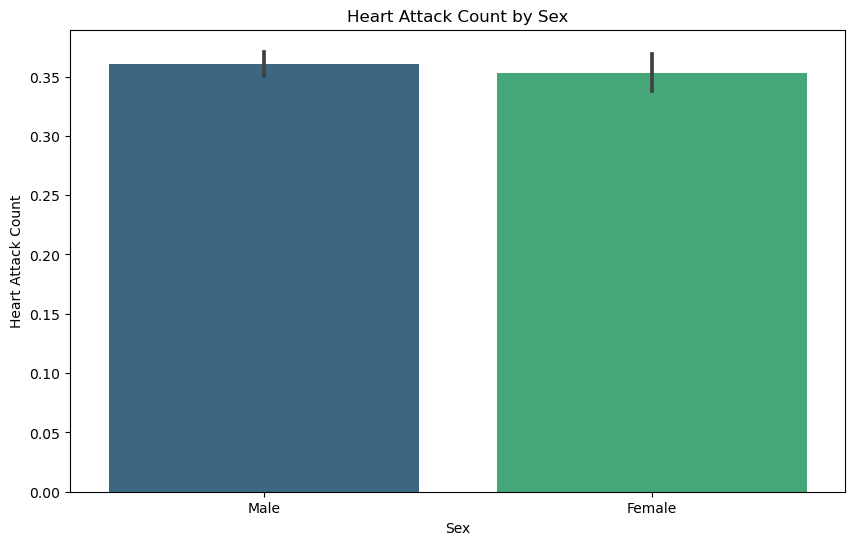

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sex',y = 'heart_attack_risk', data=df_cleaned_heart_wlb, palette='viridis')
plt.title('Heart Attack Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Heart Attack Count')
#plt.show()

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


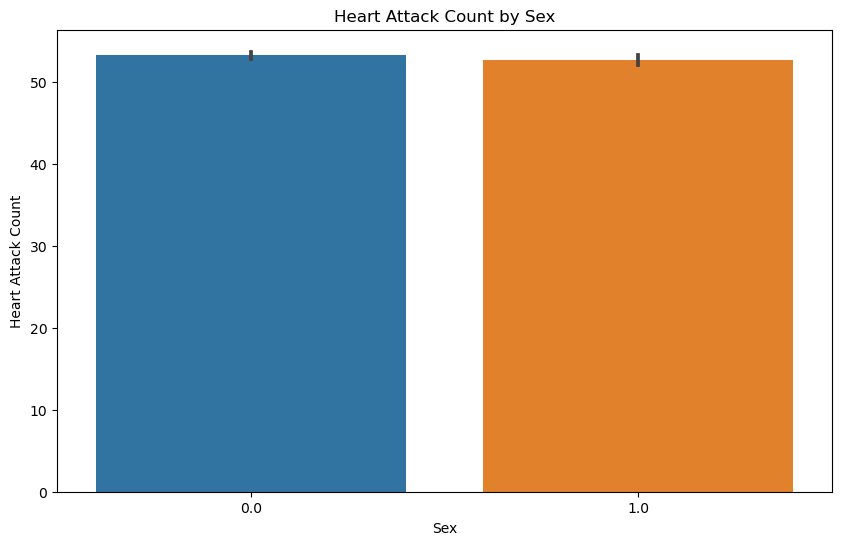

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='heart_attack_risk', y='age', data=df_heart_wlb)
plt.title('Heart Attack Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Heart Attack Count')
plt.show()

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

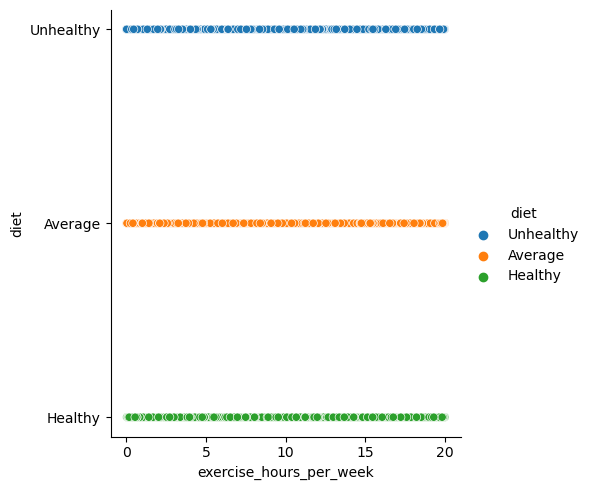

In [32]:
sns.relplot(x='exercise_hours_per_week', y='diet', 
            kind='scatter', 
            hue='diet', data=df_heart_wlb);

In [33]:
df_heart_wlb

,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,...,healthcare,access_to_mental_healthcare,inclusivity_&_tolerance,affordability,"happiness,_culture_&_leisure",city_safety,outdoor_spaces,air_quality,wellness_and_fitness,total_score
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,85.0,93.2,59.4,88.8,86.5,95.6,97.5,65.7,100.00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.6,78.6,94.6,69.9,100.0,91.8,87.1,100.0,69.1,99.46
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.7,73.0,93.9,65.0,96.3,94.9,86.0,97.0,68.3,99.24
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.2,78.6,87.5,71.6,91.5,92.8,84.0,96.2,68.7,96.33
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94.8,77.6,95.2,65.3,92.5,95.7,75.5,95.1,66.3,96.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11820,PKV6924,26.0,Male,259.0,106/64,107.0,0.0,0.0,1.0,0.0,...,50.0,65.0,89.7,71.6,59.6,1.0,87.6,94.5,50.0,50.00
11821,TRA1650,74.0,Female,306.0,125/101,84.0,0.0,0.0,1.0,1.0,...,50.0,65.0,89.7,71.6,59.6,1.0,87.6,94.5,50.0,50.00
11822,BLA5043,59.0,Male,148.0,149/76,108.0,1.0,1.0,1.0,0.0,...,50.0,65.0,89.7,71.6,59.6,1.0,87.6,94.5,50.0,50.00
11823,ASE6283,80.0,Male,144.0,176/82,57.0,1.0,1.0,1.0,0.0,...,50.0,65.0,89.7,71.6,59.6,1.0,87.6,94.5,50.0,50.00


In [34]:
#summary = df.groupby(['gender', 'heart_attack']).size().unstack(fill_value=0)
#summary.columns = ['No Heart Attack', 'Heart Attack']
#print(summary)



s_h = df_cleaned_heart_wlb.groupby(['sex','heart_attack_risk']).size().unstack(fill_value=0)
s_h.columns = ['No Heart Attack', 'Heart Attack']
print(s_h)

        No Heart Attack  Heart Attack
sex                                  
Female             2320          1267
Male               5222          2942


In [35]:
s_h_1 = s_h.reset_index()
#summary_melted = s_h.melt(id_vars = 'sex', var_name = 'heart_attack_risk', value_name = 'Count')


In [36]:
s_h_1

,sex,No Heart Attack,Heart Attack
0,Female,2320,1267
1,Male,5222,2942


In [37]:
#converting into percentage

s_h_1['Total'] = s_h_1['No Heart Attack'] + s_h_1['Heart Attack']

s_h_1['No Heart Attack (%)'] = s_h_1['No Heart Attack'] / s_h_1['Total'] * 100
s_h_1['Heart Attack (%)'] = s_h_1['Heart Attack'] / s_h_1['Total'] * 100

s_h_1.drop(columns=['Total'], inplace=True)

In [38]:
s_h_1

,sex,No Heart Attack,Heart Attack,No Heart Attack (%),Heart Attack (%)
0,Female,2320,1267,64.678004,35.321996
1,Male,5222,2942,63.963743,36.036257


In [39]:
df_per = s_h_1.melt(id_vars='sex', value_vars=['No Heart Attack (%)', 'Heart Attack (%)'], 
                    var_name='Heart Attack Status', value_name='Percentage')


In [40]:
df_per

,sex,Heart Attack Status,Percentage
0,Female,No Heart Attack (%),64.678004
1,Male,No Heart Attack (%),63.963743
2,Female,Heart Attack (%),35.321996
3,Male,Heart Attack (%),36.036257


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

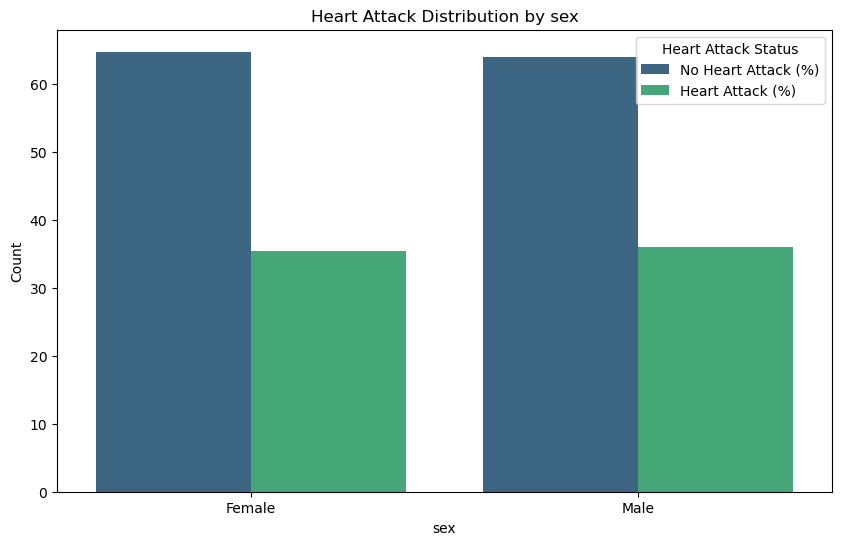

In [41]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='sex', y='Percentage', hue='Heart Attack Status', data=df_per, palette='viridis')
plt.title('Heart Attack Distribution by sex')
plt.xlabel('sex')
plt.ylabel('Count')
plt.show()

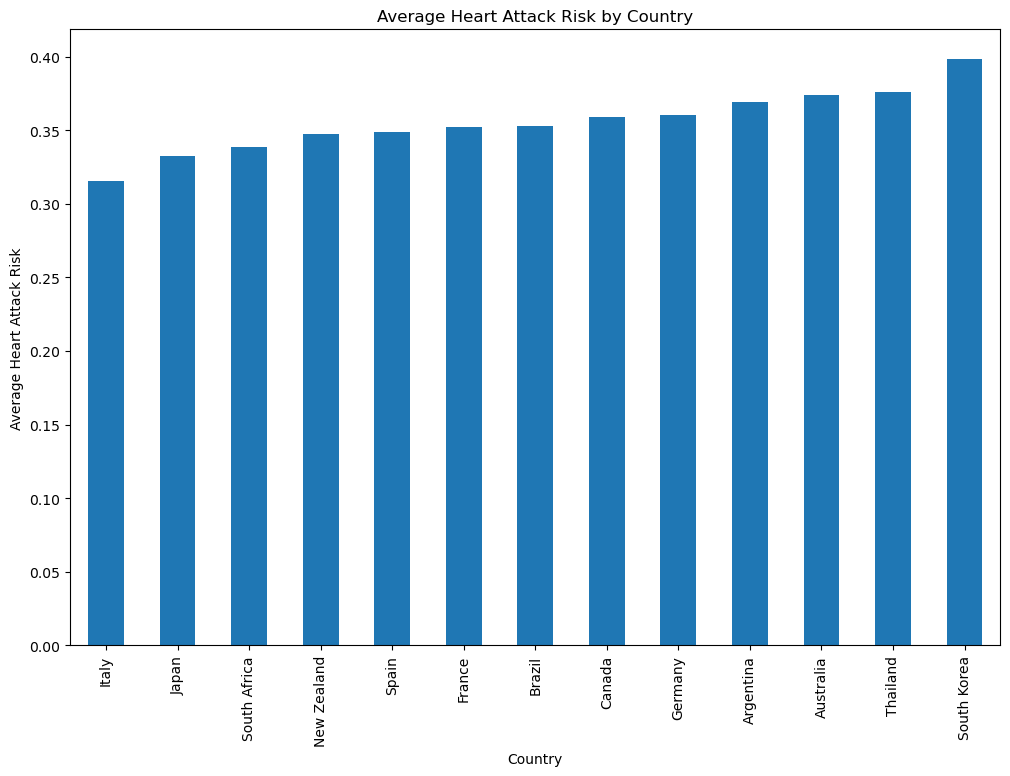

In [42]:
plt.figure(figsize=(12,8))
df_cleaned_heart_wlb.groupby("country")["heart_attack_risk"].mean().sort_values().plot(kind="bar")
plt.title( 'Average Heart Attack Risk by Country')
plt.xlabel( 'Country' )
plt.ylabel("Average Heart Attack Risk" )
plt. show()

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


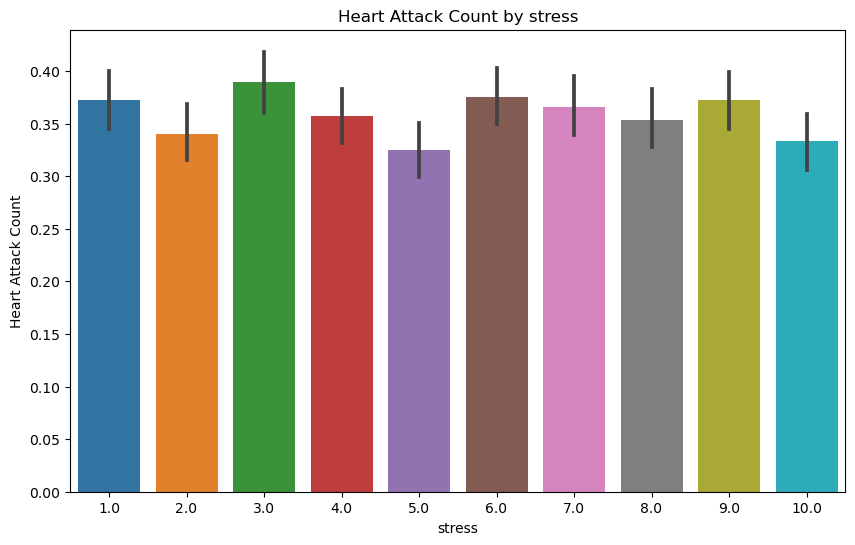

In [43]:
#stress level in count of geeting heart attack
plt.figure(figsize=(10, 6))
sns.barplot(x='stress_level', y='heart_attack_risk', data=df_heart_wlb)
plt.title('Heart Attack Count by stress')
plt.xlabel('stress')
plt.ylabel('Heart Attack Count')
plt.show()

In [44]:
#getting stress level and heart attack

#groupby

stress = df_cleaned_heart_wlb.groupby(['stress_level', 'heart_attack_risk']).size().unstack(fill_value=0)
stress.columns = ['No Heart Attack', 'Heart Attack']
print(stress)

              No Heart Attack  Heart Attack
stress_level                               
1.0                       671           398
2.0                       831           429
3.0                       725           463
4.0                       835           464
5.0                       836           403
6.0                       728           438
7.0                       731           422
8.0                       754           413
9.0                       692           410
10.0                      739           369


In [45]:
#convert count into percentage

stress['Total'] = stress['No Heart Attack'] + stress['Heart Attack']

#calculate the percentage

stress['No Heart Attack (%)'] = stress['No Heart Attack'] / stress['Total'] * 100
stress['Heart Attack (%)'] = stress['Heart Attack'] / stress['Total'] * 100


In [46]:
#droup total colum
stress.drop(columns=['Total'], inplace=True)


In [47]:
stress

,No Heart Attack,Heart Attack,No Heart Attack (%),Heart Attack (%)
stress_level,,,,
1.0,671,398,62.768943,37.231057
2.0,831,429,65.952381,34.047619
3.0,725,463,61.026936,38.973064
4.0,835,464,64.280216,35.719784
5.0,836,403,67.473769,32.526231
6.0,728,438,62.435678,37.564322
7.0,731,422,63.399827,36.600173
8.0,754,413,64.610111,35.389889
9.0,692,410,62.794918,37.205082


In [48]:
#shape the df for ploting

stress_melted = stress.reset_index().melt(id_vars='stress_level', value_vars=['No Heart Attack (%)', 'Heart Attack (%)'], 
                                             var_name='Heart Attack Status', value_name='Percentage')


In [49]:
stress_melted

,stress_level,Heart Attack Status,Percentage
0,1.0,No Heart Attack (%),62.768943
1,2.0,No Heart Attack (%),65.952381
2,3.0,No Heart Attack (%),61.026936
3,4.0,No Heart Attack (%),64.280216
4,5.0,No Heart Attack (%),67.473769
5,6.0,No Heart Attack (%),62.435678
6,7.0,No Heart Attack (%),63.399827
7,8.0,No Heart Attack (%),64.610111
8,9.0,No Heart Attack (%),62.794918
9,10.0,No Heart Attack (%),66.696751


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

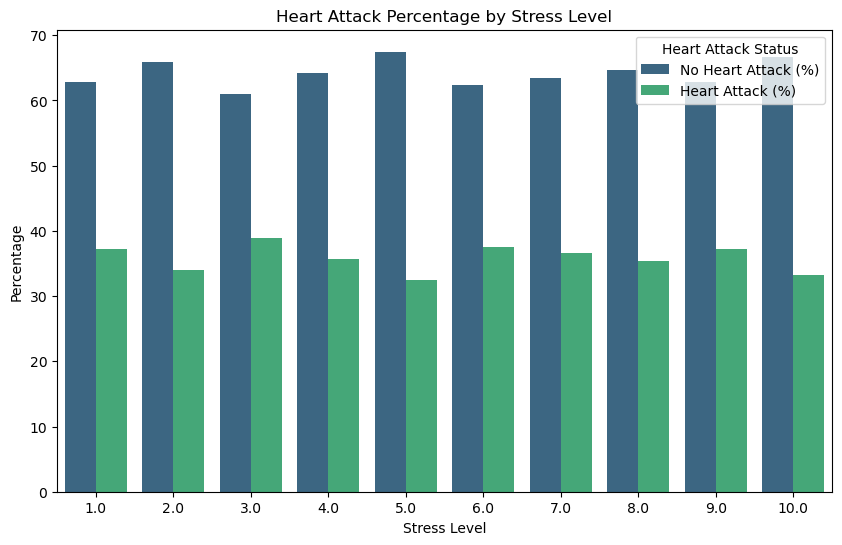

In [50]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='stress_level', y='Percentage', hue='Heart Attack Status', data=stress_melted, palette='viridis')
plt.title('Heart Attack Percentage by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Percentage')
plt.show()

In [51]:
df_cleaned_heart_wlb.columns

Index(['patient_id', 'age', 'sex', 'cholesterol', 'blood_pressure',
       'heart_rate', 'diabetes', 'family_history', 'smoking', 'obesity',
       'alcohol_consumption', 'exercise_hours_per_week', 'diet',
       'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides',
       'physical_activity_days_per_week', 'sleep_hours_per_day', 'country',
       'continent', 'hemisphere', 'heart_attack_risk', '2022', '2021', 'city',
       'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score'],
      dtype='object')

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


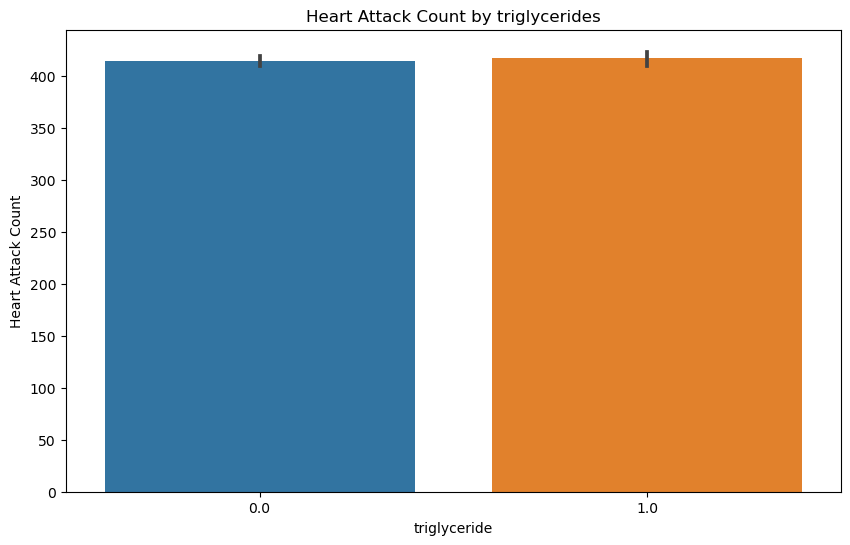

In [52]:
#getting triglyceride in count

plt.figure(figsize=(10, 6))
sns.barplot(x='heart_attack_risk', y='triglycerides', data=df_cleaned_heart_wlb)
plt.title('Heart Attack Count by triglycerides')
plt.xlabel('triglyceride')
plt.ylabel('Heart Attack Count')
plt.show()

In [53]:
#took two colums in df_cleaned_heart_wlb

new_df_tri = df_cleaned_heart_wlb[['triglycerides', 'heart_attack_risk']]


In [54]:
new_df_tri

,triglycerides,heart_attack_risk
6,235.0,0.0
7,378.0,0.0
8,284.0,1.0
9,247.0,0.0
10,747.0,0.0
...,...,...
11820,653.0,0.0
11821,418.0,1.0
11822,500.0,0.0
11823,59.0,1.0


In [55]:
#change float into int

new_df_tri['triglycerides'] = new_df_tri['triglycerides'].astype(int)


/var/folders/n8/dys0g7xj7cv3k9q6t695fbrh0000gn/T/ipykernel_37718/1140116059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_tri['triglycerides'] = new_df_tri['triglycerides'].astype(int)


In [56]:
#new_df_tri['triglycerides_level'] = new_df_tri['triglycerides'].map({60 >= 199 : 'low',200.0>=499.0 :'medium',500.0>800.0 : 'high'})

In [57]:
#use def to map


def categorize_triglycerides(value):
    if value <= 199:
        return 'low'
    elif 200 <= value <= 499:
        return 'medium'
    elif value >= 500:
        return 'high'

In [58]:
new_df_tri['triglycerides_level'] = new_df_tri['triglycerides'].apply(categorize_triglycerides)


/var/folders/n8/dys0g7xj7cv3k9q6t695fbrh0000gn/T/ipykernel_37718/853459559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_tri['triglycerides_level'] = new_df_tri['triglycerides'].apply(categorize_triglycerides)


In [59]:
new_df_tri

,triglycerides,heart_attack_risk,triglycerides_level
6,235,0.0,medium
7,378,0.0,medium
8,284,1.0,medium
9,247,0.0,medium
10,747,0.0,high
...,...,...,...
11820,653,0.0,high
11821,418,1.0,medium
11822,500,0.0,high
11823,59,1.0,low


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/n8/dys0g7xj7cv3k9q6t695fbrh0000gn/T/ipykernel_37718/3649983909.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='triglycerides_level', y='heart_attack_risk', data=new_df_tri, palette='viridis')
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be 

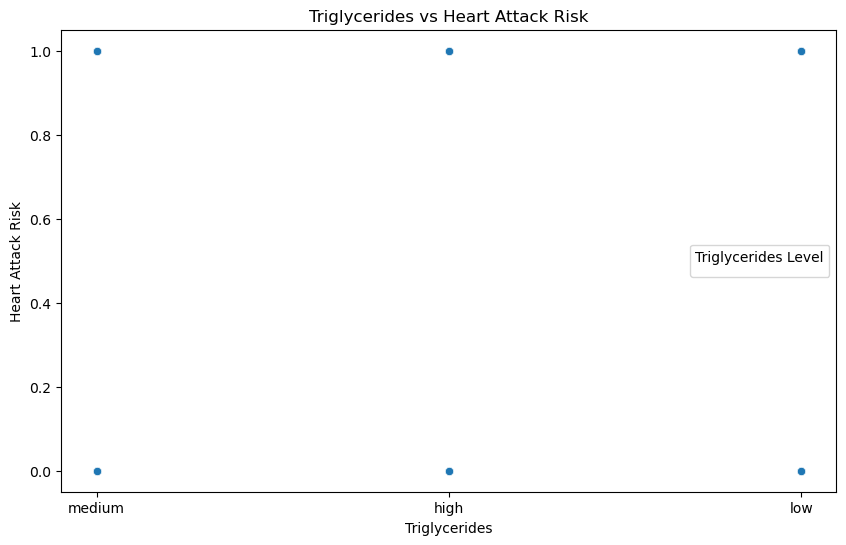

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='triglycerides_level', y='heart_attack_risk', data=new_df_tri, palette='viridis')
plt.title('Triglycerides vs Heart Attack Risk')
plt.xlabel('Triglycerides')
plt.ylabel('Heart Attack Risk')
plt.legend(title='Triglycerides Level')
plt.show()

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


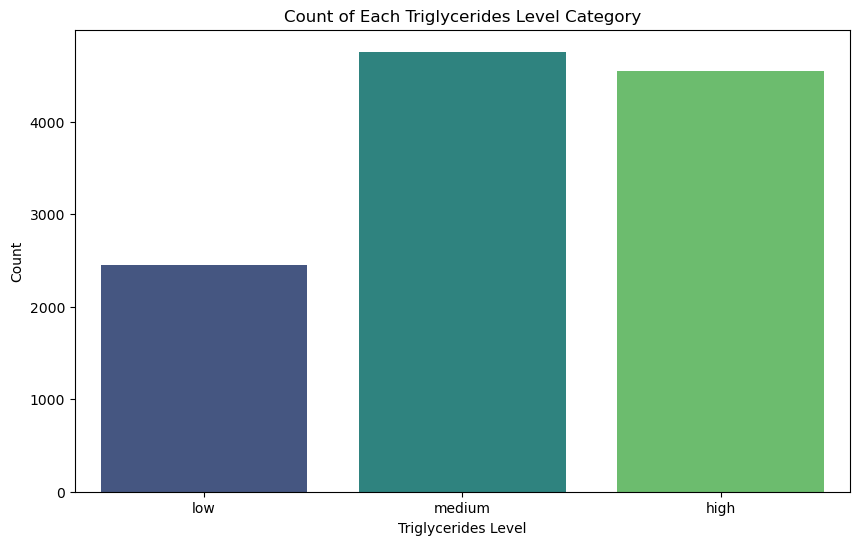

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(x='triglycerides_level', data=new_df_tri, palette='viridis', order=['low', 'medium', 'high'])
plt.title('Count of Each Triglycerides Level Category')
plt.xlabel('Triglycerides Level')
plt.ylabel('Count')
plt.show()


In [62]:
new_df_tri_1 = new_df_tri.groupby(['triglycerides_level', 'heart_attack_risk']).size().unstack(fill_value=0)
new_df_tri_1.columns = ['No Heart Attack', 'Heart Attack']
print(new_df_tri_1)

#convert count into percentage

new_df_tri_1['Total'] = new_df_tri_1['No Heart Attack'] + new_df_tri_1['Heart Attack']

#calculate the percentage

new_df_tri_1['No Heart Attack (%)'] = new_df_tri_1['No Heart Attack'] / new_df_tri_1['Total'] * 100
new_df_tri_1['Heart Attack (%)'] = new_df_tri_1['Heart Attack'] / new_df_tri_1['Total'] * 100

#droup total colum
new_df_tri_1.drop(columns=['Total'], inplace=True)


                     No Heart Attack  Heart Attack
triglycerides_level                               
high                            2882          1662
low                             1554           899
medium                          3106          1648


In [63]:
tri_melted = new_df_tri_1.reset_index().melt(id_vars='triglycerides_level', value_vars=['No Heart Attack (%)', 'Heart Attack (%)'], 
                                             var_name='Heart Attack Status', value_name='Percentage')

In [64]:
tri_melted

,triglycerides_level,Heart Attack Status,Percentage
0,high,No Heart Attack (%),63.424296
1,low,No Heart Attack (%),63.350999
2,medium,No Heart Attack (%),65.334455
3,high,Heart Attack (%),36.575704
4,low,Heart Attack (%),36.649001
5,medium,Heart Attack (%),34.665545


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

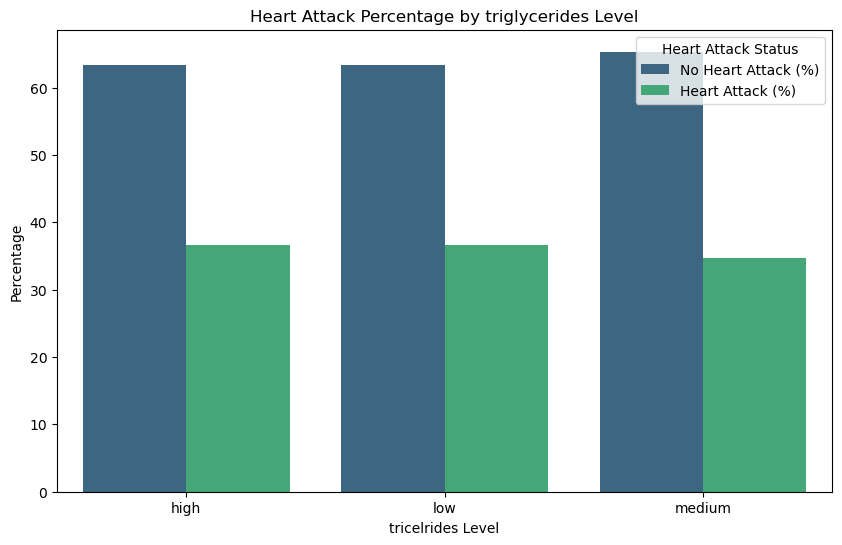

In [65]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='triglycerides_level', y='Percentage', hue='Heart Attack Status', data=tri_melted, palette='viridis')
plt.title('Heart Attack Percentage by triglycerides Level')
plt.xlabel('tricelrides Level')
plt.ylabel('Percentage')
plt.show()

In [66]:
df_cleaned_heart_wlb.columns

Index(['patient_id', 'age', 'sex', 'cholesterol', 'blood_pressure',
       'heart_rate', 'diabetes', 'family_history', 'smoking', 'obesity',
       'alcohol_consumption', 'exercise_hours_per_week', 'diet',
       'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides',
       'physical_activity_days_per_week', 'sleep_hours_per_day', 'country',
       'continent', 'hemisphere', 'heart_attack_risk', '2022', '2021', 'city',
       'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score'],
      dtype='object')

In [67]:
#sleeping hours with heart attack
#using groupby


df_sleep = df_cleaned_heart_wlb.groupby('sleep_hours_per_day')['heart_attack_risk'].mean().reset_index()
df_sleep['heart_attack_percentage'] = df_sleep['heart_attack_risk'] * 100
#print("\nGrouped DataFrame (Heart Attack Percentage):")
print(df_sleep)

   sleep_hours_per_day  heart_attack_risk  heart_attack_percentage
0                  4.0           0.363853                36.385256
1                  5.0           0.376063                37.606318
2                  6.0           0.361842                36.184211
3                  7.0           0.357831                35.783133
4                  8.0           0.407110                40.711009
5                  9.0           0.319568                31.956798
6                 10.0           0.319233                31.923294


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

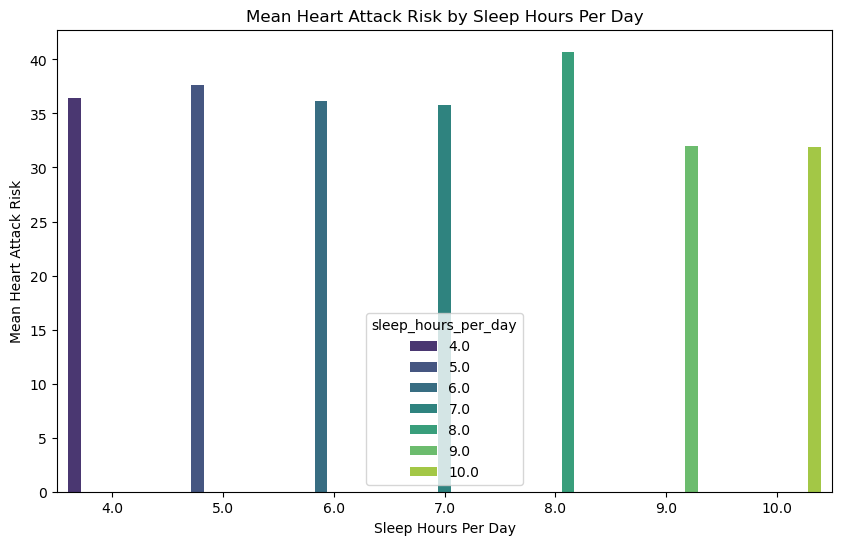

In [68]:
#sleeping hours with heart attack

plt.figure(figsize=(10, 6))
sns.barplot(x='sleep_hours_per_day', y='heart_attack_percentage',hue='sleep_hours_per_day',data=df_sleep, palette='viridis')
plt.title('Mean Heart Attack Risk by Sleep Hours Per Day')
plt.xlabel('Sleep Hours Per Day')
plt.ylabel('Mean Heart Attack Risk')
plt.show()

In [69]:
df_cleaned_heart_wlb['sleep_hours_per_day'].value_counts()

sleep_hours_per_day
10.0    1773
8.0     1744
4.0     1682
6.0     1672
7.0     1660
5.0     1646
9.0     1574
Name: count, dtype: int64

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

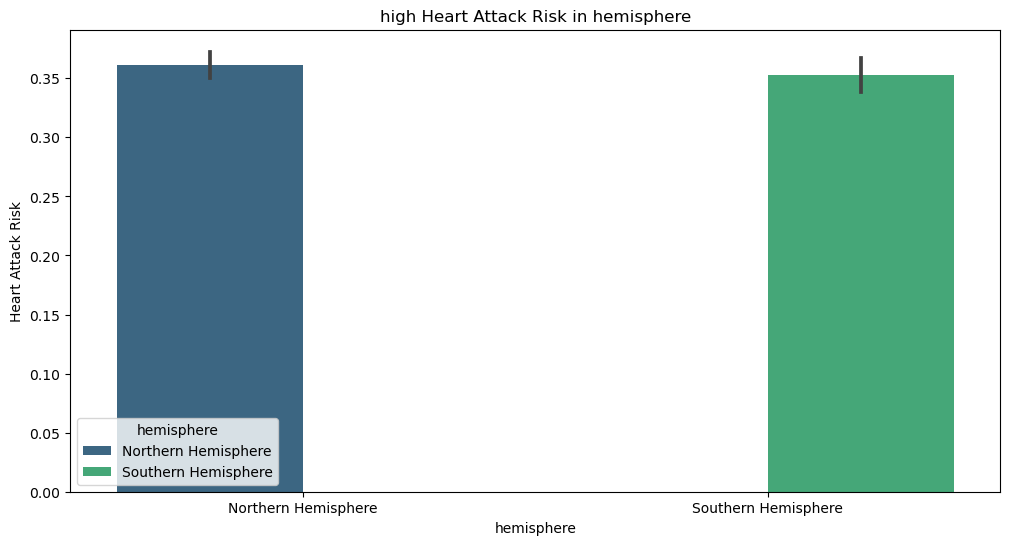

In [70]:
#hemisphere with heart risk

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='hemisphere', y='heart_attack_risk', hue='hemisphere', data=df_cleaned_heart_wlb, palette='viridis')
plt.title('high Heart Attack Risk in hemisphere')
plt.xlabel('hemisphere')
plt.ylabel('Heart Attack Risk')
#plt.legend(title='Gender')
plt.show()

In [71]:
#diebets getting heart attack

df_diebetes = df_cleaned_heart_wlb.groupby('diabetes')['heart_attack_risk'].mean().reset_index()
df_diebetes['heart_attack_percentage'] = df_diebetes['heart_attack_risk'] * 100
#print("\nGrouped DataFrame (Heart Attack Percentage):")
print(df_diebetes)

   diabetes  heart_attack_risk  heart_attack_percentage
0       0.0           0.340887                34.088670
1       1.0           0.367312                36.731244


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


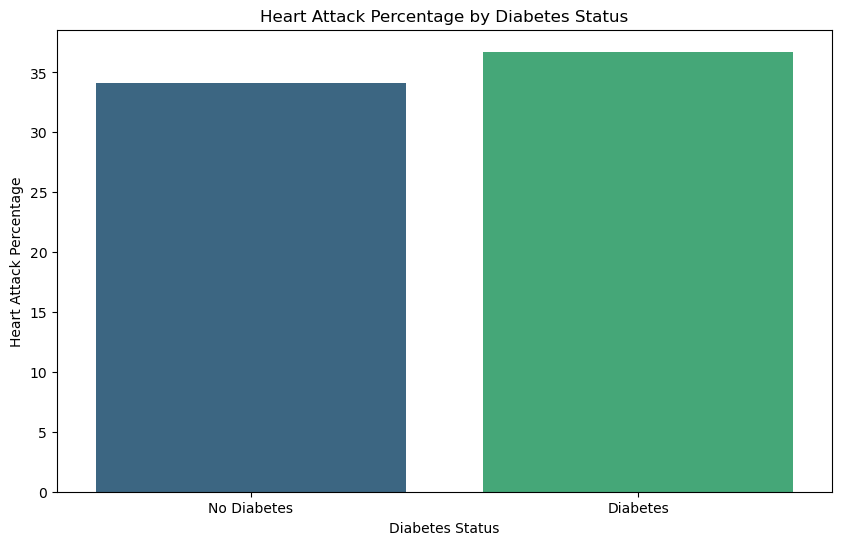

In [72]:
#pltting for diebetes

plt.figure(figsize=(10, 6))
sns.barplot(x='diabetes', y='heart_attack_percentage', data=df_diebetes, palette='viridis')
plt.title('Heart Attack Percentage by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Heart Attack Percentage')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

In [73]:
df_cleaned_heart_wlb.head()

,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,...,healthcare,access_to_mental_healthcare,inclusivity_&_tolerance,affordability,"happiness,_culture_&_leisure",city_safety,outdoor_spaces,air_quality,wellness_and_fitness,total_score
6,CZE1114,21.0,Male,389.0,165/93,98.0,1.0,1.0,1.0,1.0,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
7,JLN3497,84.0,Male,383.0,163/100,73.0,1.0,1.0,1.0,0.0,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
8,WYV0966,90.0,Male,358.0,102/73,84.0,0.0,0.0,1.0,0.0,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
9,RQX1211,60.0,Male,145.0,160/98,71.0,1.0,0.0,1.0,0.0,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
10,MBI0008,66.0,Male,340.0,180/101,69.0,1.0,0.0,1.0,1.0,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51


In [74]:
df_cleaned_heart_wlb[df_cleaned_heart_wlb['country'] == 'Canada']

,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,...,healthcare,access_to_mental_healthcare,inclusivity_&_tolerance,affordability,"happiness,_culture_&_leisure",city_safety,outdoor_spaces,air_quality,wellness_and_fitness,total_score
6,CZE1114,21.0,Male,389.0,165/93,98.0,1.0,1.0,1.0,1.0,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
7,JLN3497,84.0,Male,383.0,163/100,73.0,1.0,1.0,1.0,0.0,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
8,WYV0966,90.0,Male,358.0,102/73,84.0,0.0,0.0,1.0,0.0,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
9,RQX1211,60.0,Male,145.0,160/98,71.0,1.0,0.0,1.0,0.0,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
10,MBI0008,66.0,Male,340.0,180/101,69.0,1.0,0.0,1.0,1.0,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,QPU0969,83.0,Male,161.0,179/70,82.0,1.0,1.0,1.0,1.0,...,97.0,92.4,93.5,79.4,78.7,73.6,77.3,99.4,65.9,89.38
8273,IDR0803,64.0,Female,328.0,110/87,77.0,1.0,1.0,1.0,1.0,...,97.0,92.4,93.5,79.4,78.7,73.6,77.3,99.4,65.9,89.38
8274,GER0333,27.0,Female,319.0,96/99,53.0,1.0,1.0,0.0,1.0,...,97.0,92.4,93.5,79.4,78.7,73.6,77.3,99.4,65.9,89.38
8275,BUE0416,22.0,Male,347.0,115/87,108.0,0.0,1.0,1.0,0.0,...,97.0,92.4,93.5,79.4,78.7,73.6,77.3,99.4,65.9,89.38


In [75]:
#def get_inflation_by_country(country: str):
    #return df_cleaned_heart_wlb[df_cleaned_heart_wlb['country'] == country]['inflation']
    #get_inflation_by_country('Canada')

In [76]:
#plt.subplots(figsize = (10,5))
#sns.relplot(x='heart_attack_risk', y='air_quality', kind='scatter', 
            #hue='country', 
            #col = 'country',
            #row = 'sex',
            #data=df_cleaned_heart_wlb);

In [77]:
df_clean1_heart_wlb =df_cleaned_heart_wlb.drop(['patient_id','2022', '2021','city'],axis=1)

In [78]:
df_clean1_heart_wlb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11751 entries, 6 to 11824
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               11751 non-null  float64
 1   sex                               11751 non-null  object 
 2   cholesterol                       11751 non-null  float64
 3   blood_pressure                    11751 non-null  object 
 4   heart_rate                        11751 non-null  float64
 5   diabetes                          11751 non-null  float64
 6   family_history                    11751 non-null  float64
 7   smoking                           11751 non-null  float64
 8   obesity                           11751 non-null  float64
 9   alcohol_consumption               11751 non-null  float64
 10  exercise_hours_per_week           11751 non-null  float64
 11  diet                              11751 non-null  object 
 12  previous_

In [79]:
df_clean1_heart_wlb.describe()

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,previous_heart_problems,...,healthcare,access_to_mental_healthcare,inclusivity_&_tolerance,affordability,"happiness,_culture_&_leisure",city_safety,outdoor_spaces,air_quality,wellness_and_fitness,total_score
count,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,...,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000
mean,53.093098,258.434516,75.327547,0.654497,0.495702,0.892605,0.497319,0.595694,10.059079,0.498000,...,90.892979,77.914288,90.501821,68.538031,81.001115,67.020381,84.102944,94.293013,70.054949,86.711800
std,21.115464,80.495446,20.801825,0.475552,0.500003,0.309628,0.500014,0.490778,5.857170,0.500017,...,12.270571,10.076899,7.651668,7.930029,8.505085,21.023588,6.232239,5.485502,9.002311,10.214264
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004443,0.000000,...,50.000000,50.000000,68.500000,50.000000,59.600000,1.000000,70.100000,71.700000,50.000000,50.000000
25%,35.000000,190.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981516,0.000000,...,93.800000,70.200000,89.700000,63.100000,75.800000,68.500000,80.800000,93.100000,65.400000,84.930000
50%,53.000000,257.000000,76.000000,1.000000,0.000000,1.000000,0.000000,1.000000,10.151033,0.000000,...,94.800000,82.000000,93.300000,70.200000,84.500000,72.900000,83.300000,95.800000,68.000000,90.920000
75%,71.000000,327.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.232071,1.000000,...,97.000000,82.000000,93.700000,74.500000,85.500000,77.600000,87.900000,97.600000,72.900000,92.450000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,...,99.300000,92.400000,100.000000,79.400000,95.400000,92.500000,97.900000,99.700000,100.000000,95.510000


In [80]:
#converting percentage mutiple columns into float

#percentage_columns =['inflation','remote_jobs','overworked_population']

In [81]:
#for col in percentage_columns:
    #df_clean1_heart_wlb[col] = df_clean1_heart_wlb[col].str.replace('%', '')  # Remove the percentage sign
    #df_clean1_heart_wlb[col] = pd.to_numeric(df_clean1_heart_wlb[col])  # Convert to numeric
    #df_clean1_heart_wlb[col] = df_clean1_heart_wlb[col].astype(int)  # Convert to integer


In [82]:
#converting percentage into float

df_clean1_heart_wlb['inflation'] = df_clean1_heart_wlb['inflation'].str.replace('%', '').astype(float)


In [83]:
df_clean1_heart_wlb['multiple_jobholders'] = df_clean1_heart_wlb['multiple_jobholders'].str.replace('%', '').astype(float)

In [84]:
df_clean1_heart_wlb['remote_jobs'] = df_clean1_heart_wlb['remote_jobs'].str.replace('%', '').astype(float)

In [85]:
df_clean1_heart_wlb['overworked_population'] = df_clean1_heart_wlb['overworked_population'].str.replace('%', '').astype(float)

In [86]:
#change float into int

df_clean1_heart_wlb['inflation'] = df_clean1_heart_wlb['inflation'].astype(int)
df_clean1_heart_wlb['multiple_jobholders'] = df_clean1_heart_wlb['multiple_jobholders'].astype(int)
df_clean1_heart_wlb['remote_jobs'] = df_clean1_heart_wlb['remote_jobs'].astype(int)
df_clean1_heart_wlb['overworked_population'] = df_clean1_heart_wlb['overworked_population'].astype(int)

In [87]:
#replace '-' with nan 
df_clean1_heart_wlb['vacations_taken_(days)'] = df_clean1_heart_wlb['vacations_taken_(days)'].replace('-', np.nan)

In [88]:
#converting into float

df_clean1_heart_wlb['vacations_taken_(days)'] = df_clean1_heart_wlb['vacations_taken_(days)'].astype(float)

In [89]:
#repalacing nan the mean value

df_clean1_heart_wlb['vacations_taken_(days)'].fillna(df_clean1_heart_wlb['vacations_taken_(days)'].mean(), inplace=True)


In [90]:
#converting float into int

df_clean1_heart_wlb['vacations_taken_(days)'] = df_clean1_heart_wlb['vacations_taken_(days)'].astype(int)

In [91]:
# Average risk of a heart attack in a population between 18 and 70 years old

merged_age = df_clean1_heart_wlb[(df_clean1_heart_wlb['age'] >= 18 & (df_clean1_heart_wlb['age']<= 70))]

In [92]:
age_groups = [18, 25, 35, 45, 55, 65, 70]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-70']
merged_age['age_groups'] = pd.cut(merged_age['age'], bins=age_groups,labels =age_labels, right=False)

In [93]:
merged_age

,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,...,access_to_mental_healthcare,inclusivity_&_tolerance,affordability,"happiness,_culture_&_leisure",city_safety,outdoor_spaces,air_quality,wellness_and_fitness,total_score,age_groups
6,21.0,Male,389.0,165/93,98.0,1.0,1.0,1.0,1.0,1.0,...,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51,18-24
7,84.0,Male,383.0,163/100,73.0,1.0,1.0,1.0,0.0,1.0,...,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51,NaN
8,90.0,Male,358.0,102/73,84.0,0.0,0.0,1.0,0.0,1.0,...,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51,NaN
9,60.0,Male,145.0,160/98,71.0,1.0,0.0,1.0,0.0,1.0,...,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51,55-64
10,66.0,Male,340.0,180/101,69.0,1.0,0.0,1.0,1.0,0.0,...,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51,65-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11820,26.0,Male,259.0,106/64,107.0,0.0,0.0,1.0,0.0,0.0,...,65.0,89.7,71.6,59.6,1.0,87.6,94.5,50.0,50.00,25-34
11821,74.0,Female,306.0,125/101,84.0,0.0,0.0,1.0,1.0,0.0,...,65.0,89.7,71.6,59.6,1.0,87.6,94.5,50.0,50.00,NaN
11822,59.0,Male,148.0,149/76,108.0,1.0,1.0,1.0,0.0,1.0,...,65.0,89.7,71.6,59.6,1.0,87.6,94.5,50.0,50.00,55-64
11823,80.0,Male,144.0,176/82,57.0,1.0,1.0,1.0,0.0,1.0,...,65.0,89.7,71.6,59.6,1.0,87.6,94.5,50.0,50.00,NaN


In [94]:
grouped_sex_age = merged_age.groupby(['age_groups','sex'])['heart_attack_risk'].mean().reset_index()

/var/folders/n8/dys0g7xj7cv3k9q6t695fbrh0000gn/T/ipykernel_37718/1674520306.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_sex_age = merged_age.groupby(['age_groups','sex'])['heart_attack_risk'].mean().reset_index()


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warn

<function matplotlib.pyplot.show(close=None, block=None)>

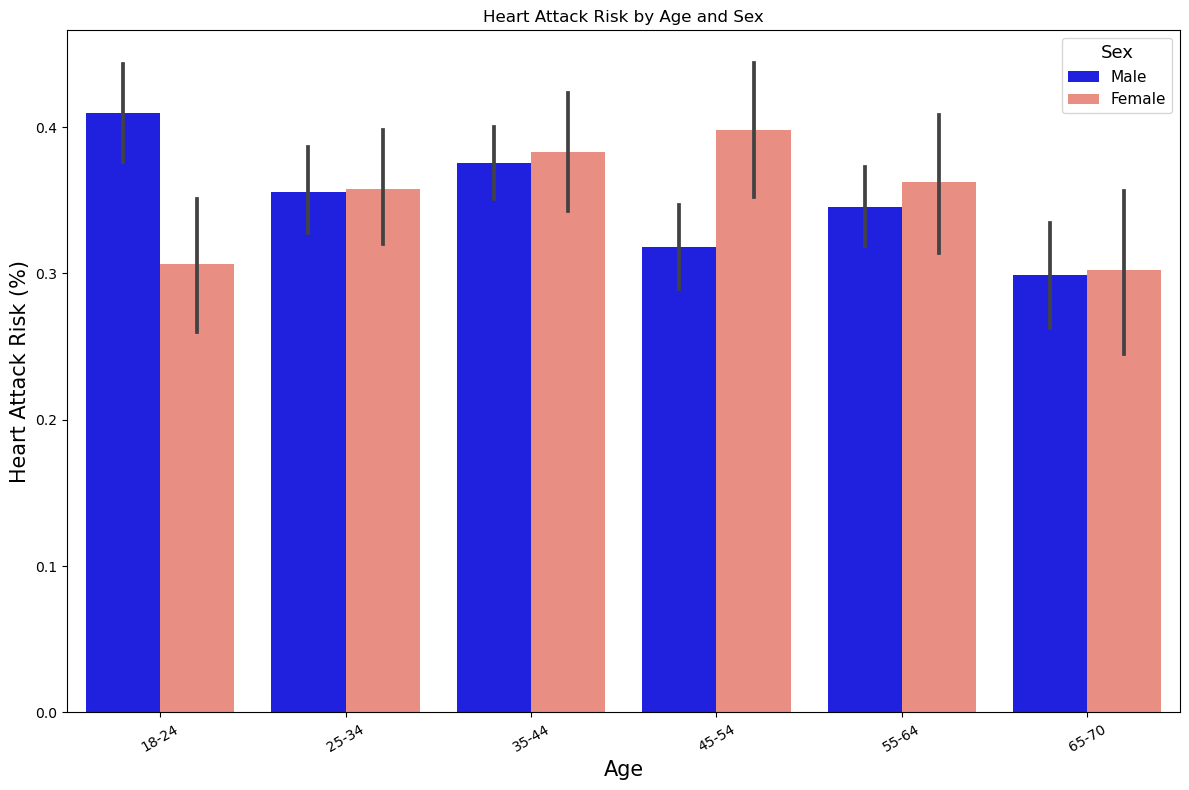

In [95]:
#plotting age sex and heart attack

sex_colors = {'Male': 'blue', 'Female':'salmon'}

plt.figure(figsize=(12,8))
age_sex = sns.barplot(data= merged_age, x= 'age_groups', y= 'heart_attack_risk', hue= 'sex', palette= sex_colors)

age_sex.set_title('Heart Attack Risk by Age and Sex')
age_sex.set_xlabel('Age', fontsize= 15)
age_sex.set_ylabel( 'Heart Attack Risk (%)', fontsize=15)

plt.legend(title='Sex', title_fontsize= '13', loc ='upper right', fontsize= '11')
plt.xticks(rotation= 30)

plt.tight_layout()
plt.show

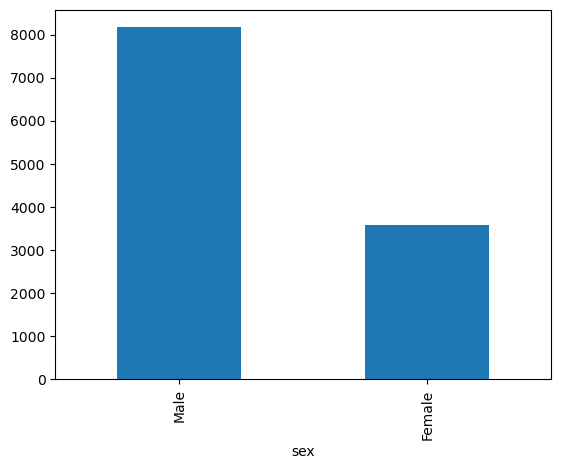

In [96]:
df_clean1_heart_wlb['sex'].value_counts().plot(kind='bar')
plt.show() 

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<function matplotlib.pyplot.show(close=None, block=None)>

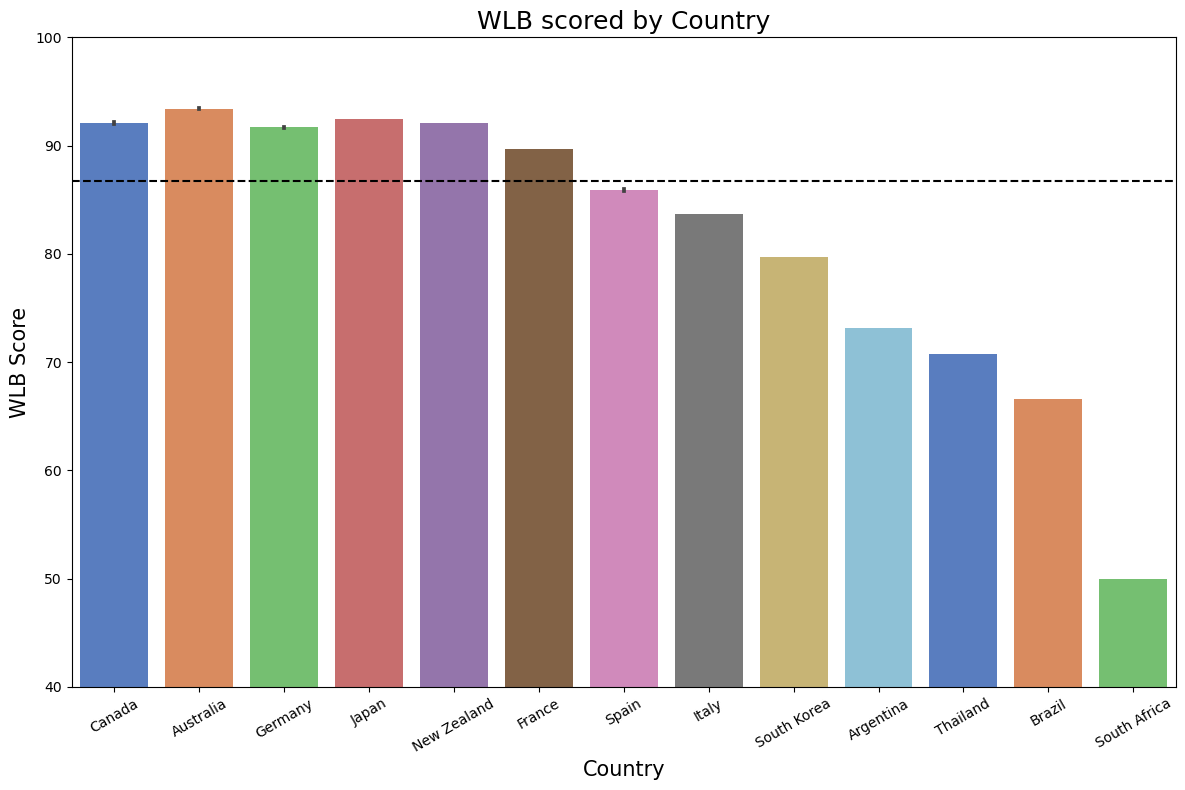

In [97]:
mean_wlb = df_clean1_heart_wlb['total_score'].mean()

plt.figure(figsize=(12,8))
countries = sns.barplot(data= df_clean1_heart_wlb, x= 'country', y= 'total_score', palette= 'muted')

countries.set_ylim(40,100)

countries.axhline(mean_wlb, color='black', linestyle='--', label=f'Mean:{mean_wlb:.2f}')

countries.set_title('WLB scored by Country', fontsize=18)
countries.set_xlabel('Country', fontsize= 15)
countries.set_ylabel( 'WLB Score', fontsize=15)

plt.xticks(rotation= 30)

plt.tight_layout()
plt.show

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<function matplotlib.pyplot.show(close=None, block=None)>

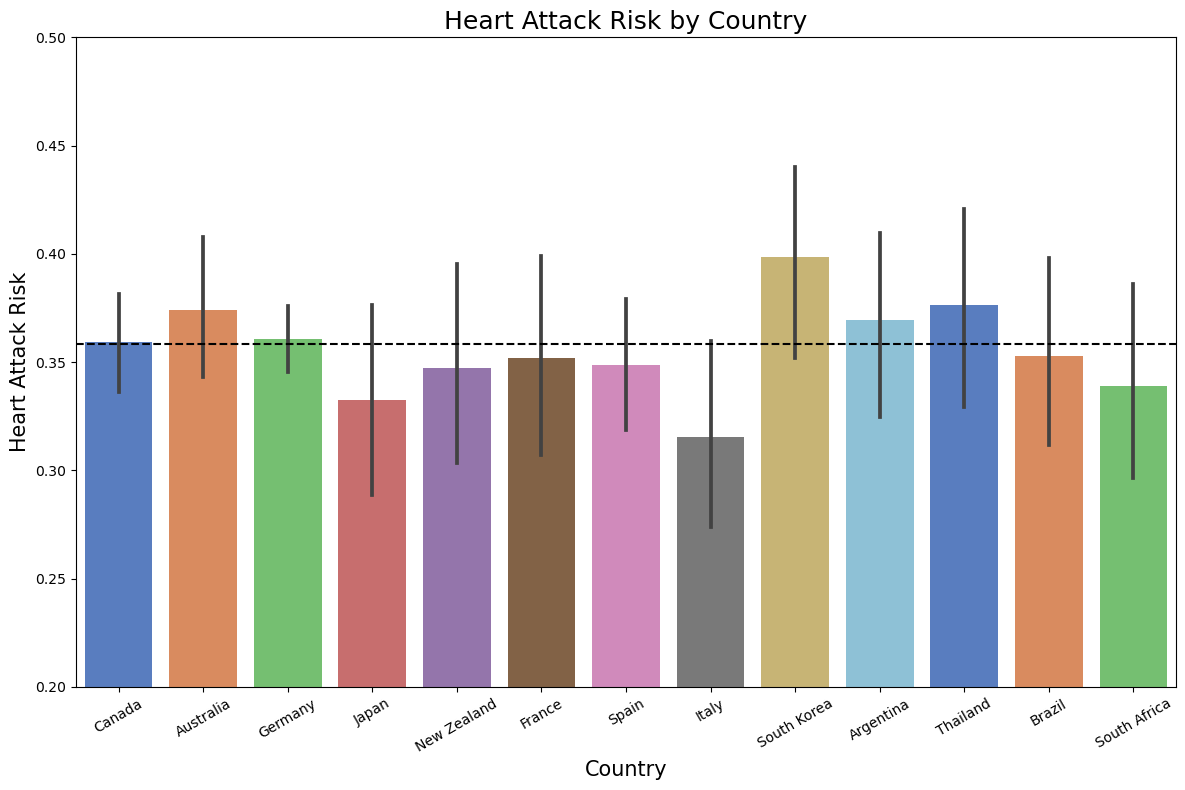

In [98]:
mean_har = df_clean1_heart_wlb['heart_attack_risk'].mean()  # har = heart attack risk

plt.figure(figsize=(12,8))
countries = sns.barplot(data= df_clean1_heart_wlb, x= 'country', y= 'heart_attack_risk', palette= 'muted')

countries.set_ylim(0.2,0.5)

countries.axhline(mean_har, color='black', linestyle='--', label=f'Mean:{mean_wlb:.2f}')

countries.set_title('Heart Attack Risk by Country', fontsize=18)
countries.set_xlabel('Country', fontsize= 15)
countries.set_ylabel( 'Heart Attack Risk', fontsize=15)

plt.xticks(rotation= 30)

plt.tight_layout()
plt.show

#float
age , cholesterol ,heart_rate ,diabetes ,family_history ,smoking ,obesity ,alcohol_consumption ,exercise_hours_per_week ,previous_heart_problems                       

        medication_use ,   stress_level,  sedentary_hours_per_day  ,income  ,bmi  ,triglycerides  ,physical_activity_days_per_week ,sleep_hours_per_day ,heart_attack_risk 
                             
          unemployment ,  paid_parental_leave_(days)           object
covid_impact                        
covid_support                       
healthcare                          
access_to_mental_healthcare         
inclusivity_&_tolerance             
affordability                       
happiness,_culture_&_leisure        
city_safety                         
outdoor_spaces                      
air_quality                         
wellness_and_fitness                
total_score                                        
                 
#int
remote_jobs                           int64
overworked_population                 int64
minimum_vacations_offered_(days)
multiple_jobholders                   int64
inflation 


#object
sex 
blood_pressure 
country                              object
continent                            object
hemisphere
vacations_taken_(days)
paid_parental_leave_(days)


In [99]:
#corelation

colrelation_keep_colum = ['age','cholesterol','heart_rate','diabetes','family_history','smoking','obesity','alcohol_consumption','exercise_hours_per_week','previous_heart_problems',                       
'medication_use','stress_level','sedentary_hours_per_day','income','bmi','triglycerides','physical_activity_days_per_week','sleep_hours_per_day','heart_attack_risk', 
                             'unemployment','paid_parental_leave_(days)','covid_impact','covid_support','healthcare','access_to_mental_healthcare','inclusivity_&_tolerance',
                   'affordability','happiness,_culture_&_leisure','city_safety','outdoor_spaces','air_quality','wellness_and_fitness','total_score' ]    


In [100]:
df_clean1_heart_wlb.dtypes

age                                 float64
sex                                  object
cholesterol                         float64
blood_pressure                       object
heart_rate                          float64
diabetes                            float64
family_history                      float64
smoking                             float64
obesity                             float64
alcohol_consumption                 float64
exercise_hours_per_week             float64
diet                                 object
previous_heart_problems             float64
medication_use                      float64
stress_level                        float64
sedentary_hours_per_day             float64
income                              float64
bmi                                 float64
triglycerides                       float64
physical_activity_days_per_week     float64
sleep_hours_per_day                 float64
country                              object
continent                       

In [101]:
#new = old.drop('B', axis=1), creating new df for the corelation

corelation = df_clean1_heart_wlb.drop(['sex','blood_pressure','diet','country','continent','hemisphere','paid_parental_leave_(days)'] ,axis=1)



In [122]:
corelation_matrix =corelation.corr().round(2)

In [123]:
corelation_matrix

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,previous_heart_problems,...,healthcare,access_to_mental_healthcare,inclusivity_&_tolerance,affordability,"happiness,_culture_&_leisure",city_safety,outdoor_spaces,air_quality,wellness_and_fitness,total_score
age,1.00,-0.03,-0.00,-0.01,0.00,0.40,-0.01,-0.00,-0.01,0.01,...,-0.01,0.00,-0.00,-0.01,-0.02,-0.01,0.00,-0.00,-0.01,-0.01
cholesterol,-0.03,1.00,0.01,-0.03,-0.00,0.01,0.00,-0.03,0.03,0.02,...,0.00,-0.00,-0.01,-0.01,-0.00,0.00,-0.01,-0.01,0.02,0.00
heart_rate,-0.00,0.01,1.00,0.03,-0.00,-0.04,0.02,-0.01,0.01,-0.01,...,-0.01,0.00,0.01,0.01,0.01,-0.01,0.01,0.01,-0.00,-0.00
diabetes,-0.01,-0.03,0.03,1.00,-0.05,0.01,0.01,0.01,-0.02,0.03,...,0.00,0.00,-0.01,-0.00,-0.02,0.00,-0.00,-0.01,0.01,-0.00
family_history,0.00,-0.00,-0.00,-0.05,1.00,0.02,-0.01,0.02,0.01,0.04,...,-0.00,0.00,-0.01,0.00,0.00,-0.00,-0.00,0.00,-0.01,0.00
smoking,0.40,0.01,-0.04,0.01,0.02,1.00,0.01,0.01,0.01,0.03,...,-0.01,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01
obesity,-0.01,0.00,0.02,0.01,-0.01,0.01,1.00,-0.03,0.02,0.00,...,-0.00,0.01,-0.00,0.00,0.00,-0.00,0.01,0.01,0.01,0.00
alcohol_consumption,-0.00,-0.03,-0.01,0.01,0.02,0.01,-0.03,1.00,-0.01,0.03,...,0.00,0.01,-0.00,-0.00,-0.01,-0.00,-0.01,-0.00,0.00,-0.00
exercise_hours_per_week,-0.01,0.03,0.01,-0.02,0.01,0.01,0.02,-0.01,1.00,-0.01,...,0.00,0.02,0.02,0.01,0.01,0.01,-0.00,0.01,-0.00,0.01
previous_heart_problems,0.01,0.02,-0.01,0.03,0.04,0.03,0.00,0.03,-0.01,1.00,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.03,-0.02,0.01


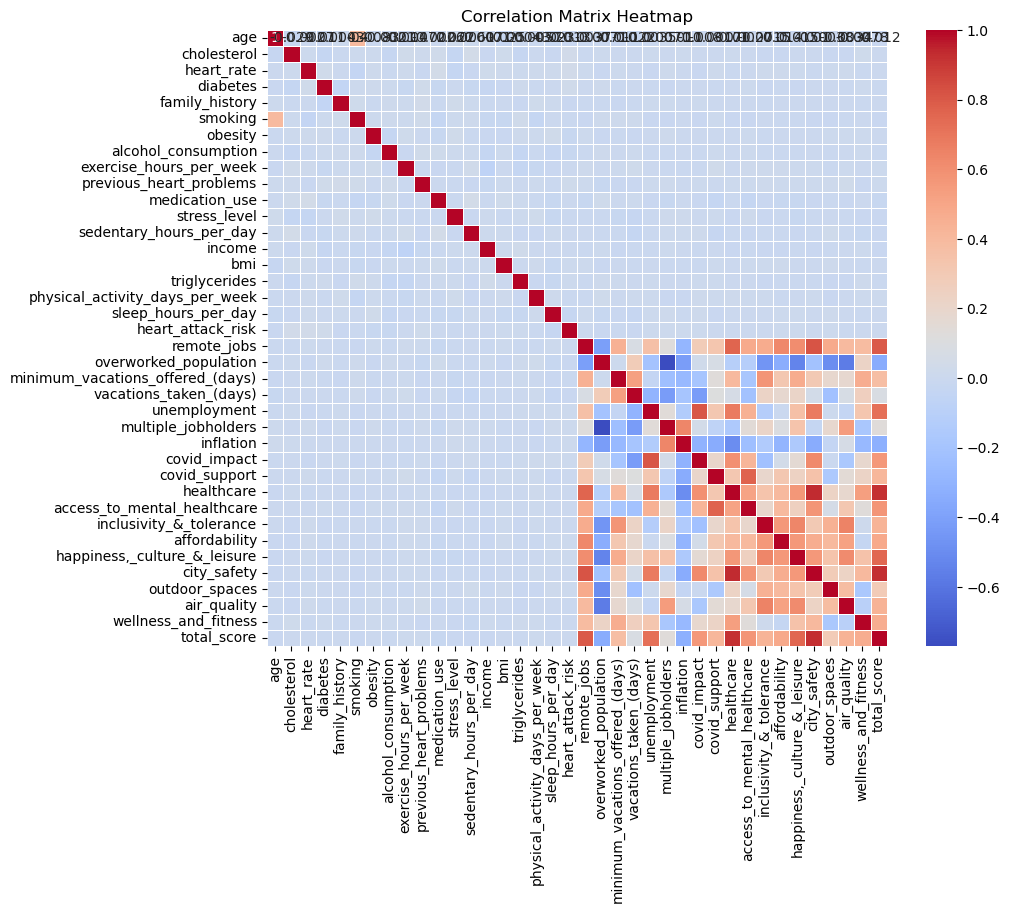

In [104]:
plt.figure(figsize=(10, 8))
sns.heatmap(corelation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [105]:
wl1 = pd.read_csv("data/work_life1.csv")


In [106]:
wl1

,ref_area.label,indicator.label,source.label,sex.label,classif1.label,time,obs_value,obs_status.label,note_source.label,note_indicator.label,note_classif.label
0,Afghanistan,Employment by sex and weekly hours actually wo...,LFS - Labour Force Survey,Sex: Total,Hour bands: Total,2021,7679.474,NaN,Repository: ILO-STATISTICS - Micro data proces...,NaN,NaN
1,Afghanistan,Employment by sex and weekly hours actually wo...,LFS - Labour Force Survey,Sex: Total,Hour bands: No hours actually worked,2021,203.431,NaN,Repository: ILO-STATISTICS - Micro data proces...,NaN,NaN
2,Afghanistan,Employment by sex and weekly hours actually wo...,LFS - Labour Force Survey,Sex: Total,Hour bands: 1-14,2021,382.294,NaN,Repository: ILO-STATISTICS - Micro data proces...,NaN,NaN
3,Afghanistan,Employment by sex and weekly hours actually wo...,LFS - Labour Force Survey,Sex: Total,Hour bands: 15-29,2021,836.046,NaN,Repository: ILO-STATISTICS - Micro data proces...,NaN,NaN
4,Afghanistan,Employment by sex and weekly hours actually wo...,LFS - Labour Force Survey,Sex: Total,Hour bands: 30-34,2021,421.698,NaN,Repository: ILO-STATISTICS - Micro data proces...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
24449,Zimbabwe,Employment by sex and weekly hours actually wo...,LFS - Labour Force Survey,Sex: Female,Hour bands: 15-29,2014,635.154,NaN,Repository: ILO-STATISTICS - Micro data proces...,NaN,NaN
24450,Zimbabwe,Employment by sex and weekly hours actually wo...,LFS - Labour Force Survey,Sex: Female,Hour bands: 30-34,2014,164.188,NaN,Repository: ILO-STATISTICS - Micro data proces...,NaN,NaN
24451,Zimbabwe,Employment by sex and weekly hours actually wo...,LFS - Labour Force Survey,Sex: Female,Hour bands: 35-39,2014,184.544,NaN,Repository: ILO-STATISTICS - Micro data proces...,NaN,NaN
24452,Zimbabwe,Employment by sex and weekly hours actually wo...,LFS - Labour Force Survey,Sex: Female,Hour bands: 40-48,2014,359.425,NaN,Repository: ILO-STATISTICS - Micro data proces...,NaN,NaN


In [107]:
wl1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24454 entries, 0 to 24453
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ref_area.label        24454 non-null  object 
 1   indicator.label       24454 non-null  object 
 2   source.label          24454 non-null  object 
 3   sex.label             24454 non-null  object 
 4   classif1.label        24454 non-null  object 
 5   time                  24454 non-null  int64  
 6   obs_value             24234 non-null  float64
 7   obs_status.label      2411 non-null   object 
 8   note_source.label     24246 non-null  object 
 9   note_indicator.label  3142 non-null   object 
 10  note_classif.label    69 non-null     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 2.1+ MB


In [108]:
wl1.drop(columns=['indicator.label','source.label','obs_status.label','note_source.label','note_indicator.label','note_classif.label'],axis=1, inplace=True)

In [109]:
df_wl1 = wl1.rename(columns={'ref_area.label':'country','time':'year','obs_value':'working_hours_per_weak','sex.label':'sex','classif1.label':'age'})

In [110]:
df_wl1

,country,sex,age,year,working_hours_per_weak
0,Afghanistan,Sex: Total,Hour bands: Total,2021,7679.474
1,Afghanistan,Sex: Total,Hour bands: No hours actually worked,2021,203.431
2,Afghanistan,Sex: Total,Hour bands: 1-14,2021,382.294
3,Afghanistan,Sex: Total,Hour bands: 15-29,2021,836.046
4,Afghanistan,Sex: Total,Hour bands: 30-34,2021,421.698
...,...,...,...,...,...
24449,Zimbabwe,Sex: Female,Hour bands: 15-29,2014,635.154
24450,Zimbabwe,Sex: Female,Hour bands: 30-34,2014,164.188
24451,Zimbabwe,Sex: Female,Hour bands: 35-39,2014,184.544
24452,Zimbabwe,Sex: Female,Hour bands: 40-48,2014,359.425


In [111]:
df_fliter_year_country = df_wl1[df_wl1['year'].isin([2021,2022]) & df_wl1['country'].isin(['Canada', 'Australia', 'Germany', 'Japan', 'New Zealand', 'France',
       'Spain', 'Italy', 'South Korea', 'Argentina', 'Thailand', 'Brazil',
       'South Africa'])]

In [112]:
df_fliter_year_country

,country,sex,age,year,working_hours_per_weak
504,Argentina,Sex: Total,Hour bands: Total,2022,12881.228
505,Argentina,Sex: Total,Hour bands: No hours actually worked,2022,564.058
506,Argentina,Sex: Total,Hour bands: 1-14,2022,1186.286
507,Argentina,Sex: Total,Hour bands: 15-29,2022,2290.337
508,Argentina,Sex: Total,Hour bands: 30-34,2022,1257.672
...,...,...,...,...,...
23999,South Africa,Sex: Female,Hour bands: 15-29,2021,740.819
24000,South Africa,Sex: Female,Hour bands: 30-34,2021,291.119
24001,South Africa,Sex: Female,Hour bands: 35-39,2021,386.192
24002,South Africa,Sex: Female,Hour bands: 40-48,2021,3837.240


In [113]:
df_clean1_heart_wlb['country'].unique()

array(['Canada', 'Australia', 'Germany', 'Japan', 'New Zealand', 'France',
       'Spain', 'Italy', 'South Korea', 'Argentina', 'Thailand', 'Brazil',
       'South Africa'], dtype=object)

In [114]:
df_final = df_clean1_heart_wlb.merge(df_fliter_year_country, how = 'left', on = 'country')

In [115]:
df_final

,age_x,sex_x,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,...,"happiness,_culture_&_leisure",city_safety,outdoor_spaces,air_quality,wellness_and_fitness,total_score,sex_y,age_y,year,working_hours_per_weak
0,21.0,Male,389.0,165/93,98.0,1.0,1.0,1.0,1.0,1.0,...,81.4,84.8,97.0,99.2,68.7,95.51,Sex: Total,Hour bands: Total,2022.0,19692.982
1,21.0,Male,389.0,165/93,98.0,1.0,1.0,1.0,1.0,1.0,...,81.4,84.8,97.0,99.2,68.7,95.51,Sex: Total,Hour bands: No hours actually worked,2022.0,1855.165
2,21.0,Male,389.0,165/93,98.0,1.0,1.0,1.0,1.0,1.0,...,81.4,84.8,97.0,99.2,68.7,95.51,Sex: Total,Hour bands: 1-14,2022.0,1356.423
3,21.0,Male,389.0,165/93,98.0,1.0,1.0,1.0,1.0,1.0,...,81.4,84.8,97.0,99.2,68.7,95.51,Sex: Total,Hour bands: 15-29,2022.0,2817.890
4,21.0,Male,389.0,165/93,98.0,1.0,1.0,1.0,1.0,1.0,...,81.4,84.8,97.0,99.2,68.7,95.51,Sex: Total,Hour bands: 30-34,2022.0,2162.118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508708,60.0,Male,156.0,111/96,83.0,1.0,1.0,1.0,0.0,1.0,...,59.6,1.0,87.6,94.5,50.0,50.00,Sex: Female,Hour bands: 15-29,2021.0,740.819
508709,60.0,Male,156.0,111/96,83.0,1.0,1.0,1.0,0.0,1.0,...,59.6,1.0,87.6,94.5,50.0,50.00,Sex: Female,Hour bands: 30-34,2021.0,291.119
508710,60.0,Male,156.0,111/96,83.0,1.0,1.0,1.0,0.0,1.0,...,59.6,1.0,87.6,94.5,50.0,50.00,Sex: Female,Hour bands: 35-39,2021.0,386.192
508711,60.0,Male,156.0,111/96,83.0,1.0,1.0,1.0,0.0,1.0,...,59.6,1.0,87.6,94.5,50.0,50.00,Sex: Female,Hour bands: 40-48,2021.0,3837.240


In [116]:
df_final.shape

(508713, 49)

In [117]:
df_final.isnull().sum()

age_x                                  0
sex_x                                  0
cholesterol                            0
blood_pressure                         0
heart_rate                             0
diabetes                               0
family_history                         0
smoking                                0
obesity                                0
alcohol_consumption                    0
exercise_hours_per_week                0
diet                                   0
previous_heart_problems                0
medication_use                         0
stress_level                           0
sedentary_hours_per_day                0
income                                 0
bmi                                    0
triglycerides                          0
physical_activity_days_per_week        0
sleep_hours_per_day                    0
country                                0
continent                              0
hemisphere                             0
heart_attack_ris

push the database to sql

In [118]:
# Import the get_engine function from our sql_functions.
from sql_functions import get_engine #adjust this as necessary to match your sql_functions.py connection methods

In [119]:
schema = 'cgn_analytics_24_2' # UPDATE 'TABLE_SCHEMA' based on schema used in class 
engine = get_engine() # assign engine to be able to query against the database



In [121]:
# Specify which table within your database you want to push your data to. Give your table an unambiguous name.
# Example: flights_sp for Sina's flights table, flights_groupname or similar
table_name = 'df_clean1_heart_wlb'
# If the specified table doesn't exist yet, it will be created
# With 'replace', your data will be replaced if the table already exists.
# This may take some time ...

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        df_clean1_heart_wlb.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The df_clean1_heart_wlb table was imported successfully.


statistical test

In [154]:
df_clean1_heart_wlb.head()

,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,...,healthcare,access_to_mental_healthcare,inclusivity_&_tolerance,affordability,"happiness,_culture_&_leisure",city_safety,outdoor_spaces,air_quality,wellness_and_fitness,total_score
6,21.0,Male,389.0,165/93,98.0,1.0,1.0,1.0,1.0,1.0,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
7,84.0,Male,383.0,163/100,73.0,1.0,1.0,1.0,0.0,1.0,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
8,90.0,Male,358.0,102/73,84.0,0.0,0.0,1.0,0.0,1.0,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
9,60.0,Male,145.0,160/98,71.0,1.0,0.0,1.0,0.0,1.0,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
10,66.0,Male,340.0,180/101,69.0,1.0,0.0,1.0,1.0,0.0,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51


In [124]:
from scipy.stats import ttest_ind
# T-test for heart attack risk by smoking status
smokers = df_clean1_heart_wlb[df_clean1_heart_wlb['smoking'] == 1] ['heart_attack_risk']
non_smokers = df_clean1_heart_wlb[df_clean1_heart_wlb['smoking']==0]['heart_attack_risk']
t_stat, p_value = ttest_ind(smokers, non_smokers)
print(f'T-test results: t-statistic = (t_stat), p-value = (p _value)')

T-test results: t-statistic = (t_stat), p-value = (p _value)


In [156]:
# Split data into two groups
obesity_1 = df_clean1_heart_wlb[df_clean1_heart_wlb['obesity'] == 1]['heart_attack_risk']
obesity_0 = df_clean1_heart_wlb[df_clean1_heart_wlb['obesity'] == 0]['heart_attack_risk']

# Perform t-test
t_stat, p_value = ttest_ind(obesity_1, obesity_0)

# Print results
print(f"\nT-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups.")


T-statistic: -2.2405181627749093
P-value: 0.025075915330885903
Reject the null hypothesis. There is a significant difference between the groups.


In [157]:
# Split data into two groups
family_1 = df_clean1_heart_wlb[df_clean1_heart_wlb['family_history'] == 1]['heart_attack_risk']
family_0 = df_clean1_heart_wlb[df_clean1_heart_wlb['family_history'] == 0]['heart_attack_risk']

# Perform t-test
t_stat, p_value = ttest_ind(family_1, family_0)

# Print results
print(f"\nT-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups.")


T-statistic: -1.208741729608221
P-value: 0.226786409799136
Fail to reject the null hypothesis. There is no significant difference between the groups.


In [158]:
# Split data into two groups
diabetes_1 = df_clean1_heart_wlb[df_clean1_heart_wlb['diabetes'] == 1]['heart_attack_risk']
diabetes_0 = df_clean1_heart_wlb[df_clean1_heart_wlb['diabetes'] == 0]['heart_attack_risk']

# Perform t-test
t_stat, p_value = ttest_ind(diabetes_1, diabetes_0)

# Print results
print(f"\nT-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups.")


T-statistic: 2.8418331475547243
P-value: 0.004493220531283819
Reject the null hypothesis. There is a significant difference between the groups.


In [159]:
# Split data into two groups
alcohol_1 = df_clean1_heart_wlb[df_clean1_heart_wlb['alcohol_consumption'] == 1]['heart_attack_risk']
alcohol_0 = df_clean1_heart_wlb[df_clean1_heart_wlb['alcohol_consumption'] == 0]['heart_attack_risk']

# Perform t-test
t_stat, p_value = ttest_ind(alcohol_1, alcohol_0)

# Print results
print(f"\nT-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups.")


T-statistic: -2.0104331893141745
P-value: 0.04440816949010908
Reject the null hypothesis. There is a significant difference between the groups.


In [160]:
# Split data into two groups
heart_1 = df_clean1_heart_wlb[df_clean1_heart_wlb['heart_attack_risk'] == 1]['inflation']
heart_0 = df_clean1_heart_wlb[df_clean1_heart_wlb['heart_attack_risk'] == 0]['inflation']

# Perform t-test
t_stat, p_value = ttest_ind(heart_1, heart_0)

# Print results
print(f"\nT-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups.")


T-statistic: 0.47183730442329375
P-value: 0.6370516838510216
Fail to reject the null hypothesis. There is no significant difference between the groups.


In [161]:
# Split data into two groups
heart_1 = df_clean1_heart_wlb[df_clean1_heart_wlb['heart_attack_risk'] == 1]['wellness_and_fitness']
heart_0 = df_clean1_heart_wlb[df_clean1_heart_wlb['heart_attack_risk'] == 0]['wellness_and_fitness']

# Perform t-test
t_stat, p_value = ttest_ind(heart_1, heart_0)

# Print results
print(f"\nT-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups.")


T-statistic: -0.2717981989177642
P-value: 0.7857819658144274
Fail to reject the null hypothesis. There is no significant difference between the groups.


In [163]:
from scipy.stats import pearsonr, spearmanr

# Pearson Correlation
pearson_corr, pearson_p_value = pearsonr(df_clean1_heart_wlb['wellness_and_fitness'], df_clean1_heart_wlb['total_score'])
print(f"Pearson correlation: {pearson_corr}, P-value: {pearson_p_value}")

# Spearman Correlation
spearman_corr, spearman_p_value = spearmanr(df_clean1_heart_wlb['wellness_and_fitness'], df_clean1_heart_wlb['total_score'])
print(f"Spearman correlation: {spearman_corr}, P-value: {spearman_p_value}")


Pearson correlation: 0.4640237157220862, P-value: 0.0
Spearman correlation: 0.21469632787451595, P-value: 1.375638073305337e-122


In [164]:
import statsmodels.api as sm

# Define the dependent and independent variables
X = df_clean1_heart_wlb['wellness_and_fitness']
y = df_clean1_heart_wlb['total_score']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Perform the regression
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            total_score   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     3224.
Date:                Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:39:05   Log-Likelihood:                -42556.
No. Observations:               11751   AIC:                         8.512e+04
Df Residuals:                   11749   BIC:                         8.513e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   49.8283 

In [166]:
df_clean1_heart_wlb.columns

Index(['age', 'sex', 'cholesterol', 'blood_pressure', 'heart_rate', 'diabetes',
       'family_history', 'smoking', 'obesity', 'alcohol_consumption',
       'exercise_hours_per_week', 'diet', 'previous_heart_problems',
       'medication_use', 'stress_level', 'sedentary_hours_per_day', 'income',
       'bmi', 'triglycerides', 'physical_activity_days_per_week',
       'sleep_hours_per_day', 'country', 'continent', 'hemisphere',
       'heart_attack_risk', 'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score'],
      dtype='object')

The Pearson correlation coefficient ranges from -1 to +1.
+1 indicates a perfect positive linear relationship.
-1 indicates a perfect negative linear relationship.
0 indicates no linear relationship.


In [200]:
from scipy.stats import pearsonr

# Hypothesis 1: heart_attack and Overworked Population
corr_remote_overworked, p_remote_overworked = pearsonr(df_clean1_heart_wlb['heart_attack_risk'], df_clean1_heart_wlb['overworked_population'])
print(f"Correlation between heart_attack and Overworked Population: {corr_remote_overworked}, P-value: {p_remote_overworked}")

Correlation between heart_attack and Overworked Population: -0.01049496158886087, P-value: 0.2552936305809788


In [201]:
# Hypothesis 2: Minimum Vacations Offered and Vacations Taken
corr_vacations_offered_taken, p_vacations_offered_taken = pearsonr(df_clean1_heart_wlb['heart_attack_risk'], df_clean1_heart_wlb['vacations_taken_(days)'])
print(f"Correlation between Minimum Vacations Offered and Vacations Taken: {corr_vacations_offered_taken}, P-value: {p_vacations_offered_taken}")

Correlation between Minimum Vacations Offered and Vacations Taken: -0.011834202303381362, P-value: 0.19957617442032646


In [170]:
# Hypothesis 3: Remote Jobs and Vacations Taken
corr_remote_vacations_taken, p_remote_vacations_taken = pearsonr(df_clean1_heart_wlb['remote_jobs'], df_clean1_heart_wlb['vacations_taken_(days)'])
print(f"Correlation between Remote Jobs and Vacations Taken: {corr_remote_vacations_taken}, P-value: {p_remote_vacations_taken}")


Correlation between Remote Jobs and Vacations Taken: 0.07806547653860042, P-value: 2.3611095072655408e-17


In [171]:
# Hypothesis 4: Overworked Population and Vacations Taken
corr_overworked_vacations_taken, p_overworked_vacations_taken = pearsonr(df_clean1_heart_wlb['overworked_population'], df_clean1_heart_wlb['vacations_taken_(days)'])
print(f"Correlation between Overworked Population and Vacations Taken: {corr_overworked_vacations_taken}, P-value: {p_overworked_vacations_taken}")

Correlation between Overworked Population and Vacations Taken: 0.2855075421759595, P-value: 3.01295814717902e-219


In [173]:
# Hypothesis 5: Remote Jobs and Minimum Vacations Offered
corr_remote_vacations_offered, p_remote_vacations_offered = pearsonr(df_clean1_heart_wlb['remote_jobs'], df_clean1_heart_wlb['minimum_vacations_offered_(days)'])
print(f"Correlation between Remote Jobs and Minimum Vacations Offered: {corr_remote_vacations_offered}, P-value: {p_remote_vacations_offered}")

Correlation between Remote Jobs and Minimum Vacations Offered: 0.44161280613808895, P-value: 0.0


In [142]:
# Filter the data for smokers who have had a heart attack
smokers_with_heart_attack = df_clean1_heart_wlb[(df_clean1_heart_wlb['smoking'] == 1) & (df_clean1_heart_wlb['heart_attack_risk'] == 1)]

# Aggregate the data by country
heart_attack_by_country = smokers_with_heart_attack.groupby('country').size().reset_index(name='HeartAttackCount')


print(heart_attack_by_country)



         country  HeartAttackCount
0      Argentina               158
1      Australia               298
2         Brazil               143
3         Canada               536
4         France               137
5        Germany              1404
6          Italy               121
7          Japan               132
8    New Zealand               140
9   South Africa               130
10   South Korea               144
11         Spain               264
12      Thailand               144


In [ ]:
# Set the plot style
mean_smoke = df_clean1_heart_wlb['smoking'].mean()

#sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
smoke = sns.barplot(x='country', y='HeartAttackCount', data=heart_attack_by_country, palette='viridis')
#countries.set_ylim(0.2,0.5)

smoke.axhline(mean_smoke, color='black', linestyle='--', label=f'Mean:{mean_wlb:.2f}')


# Add titles and labels
plt.title('Heart Attack Cases Due to Smoking by Country')
plt.xlabel('Country')
plt.ylabel('Number of Heart Attack Cases')
plt.xticks(rotation=45)

In [ ]:
smokers_df = df_clean1_heart_wlb[df_clean1_heart_wlb['smoking'] == True]

# Group by country and calculate the mean of heart attacks
mean_heart_attacks = smokers_df.groupby('country')['heart_attack_risk'].mean().reset_index()
print("\nMean heart attacks for each country due to smoking:")
print(mean_heart_attacks)

In [153]:
# Calculate the overall mean of heart attacks for smokers
overall_mean = smokers_df['heart_attack_risk'].mean()

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


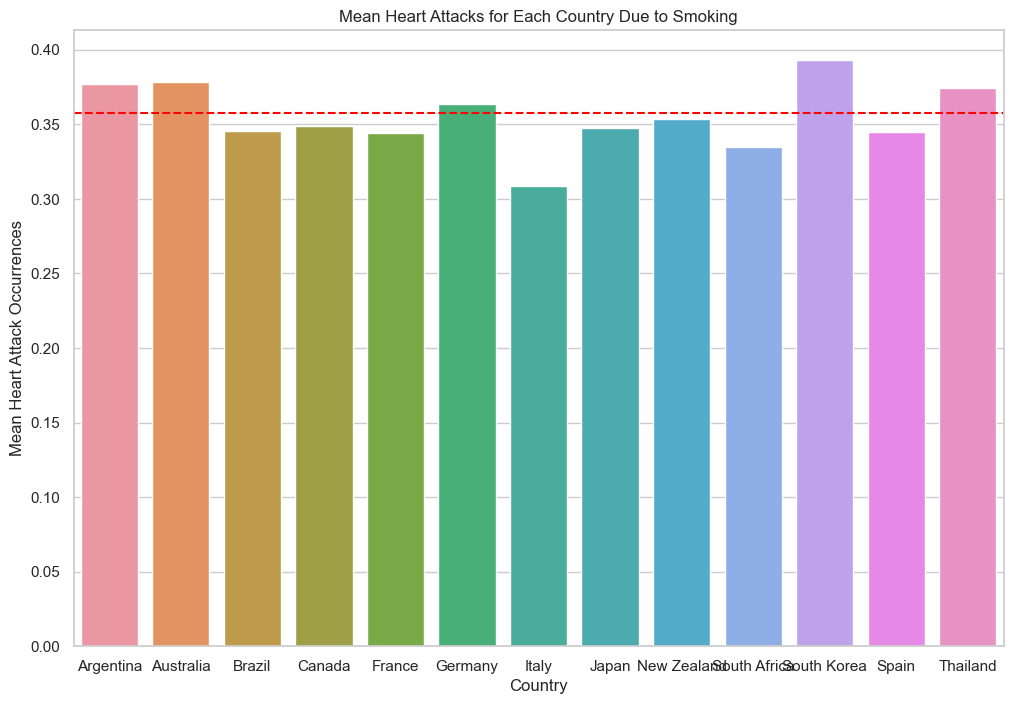

In [151]:
# Plot the data using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='heart_attack_risk', data=mean_heart_attacks)
plt.axhline(overall_mean, color='red', linestyle='--', label=f'Overall Mean: {overall_mean:.2f}')
plt.title('Mean Heart Attacks for Each Country Due to Smoking')
plt.xlabel('Country')
plt.ylabel('Mean Heart Attack Occurrences')
plt.show()

hypothesis

In [175]:
df_clean1_heart_wlb.columns

Index(['age', 'sex', 'cholesterol', 'blood_pressure', 'heart_rate', 'diabetes',
       'family_history', 'smoking', 'obesity', 'alcohol_consumption',
       'exercise_hours_per_week', 'diet', 'previous_heart_problems',
       'medication_use', 'stress_level', 'sedentary_hours_per_day', 'income',
       'bmi', 'triglycerides', 'physical_activity_days_per_week',
       'sleep_hours_per_day', 'country', 'continent', 'hemisphere',
       'heart_attack_risk', 'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score'],
      dtype='object')

In [176]:
#no.1 Calculate Work-Life Balance Score (example: average of normalized scores)
scaler = StandardScaler()
df_clean1_heart_wlb['Overworked Population (Normalized)'] = scaler.fit_transform(df_clean1_heart_wlb[['overworked_population']])
df_clean1_heart_wlb['Vacations Taken (Days) (Normalized)'] = scaler.fit_transform(df_clean1_heart_wlb[['vacations_taken_(days)']])
df_clean1_heart_wlb['Work-Life Balance Score'] = df_clean1_heart_wlb[['Overworked Population (Normalized)', 'Vacations Taken (Days) (Normalized)']].mean(axis=1)


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/utils/validation.py:767: Future

In [179]:
# Logistic Regression Analysis
X = df_clean1_heart_wlb[['Work-Life Balance Score']]
y = df_clean1_heart_wlb['heart_attack_risk']
log_reg = LogisticRegression().fit(X, y)


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/utils/validation.py:605: Future

In [180]:

#Predict probabilities
df_clean1_heart_wlb['Risk Prediction'] = log_reg.predict_proba(X)[:, 1]

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Work-Life Balance Score', y='heart_attack_risk', data=df_clean1_heart_wlb, hue='heart_attack_risk', palette='coolwarm')
plt.title('Work-Life Balance Score vs. Heart Attack Risk')
plt.xlabel('Work-Life Balance Score')
plt.ylabel('Heart Attack Risk')
plt.show()

In [187]:
#no.2 heart_attack_risk,bp,bmi,cholostrol

df_clean1_heart_wlb[['Systolic BP', 'Diastolic BP']] = df_clean1_heart_wlb['blood_pressure'].str.split('/', expand=True)
df_clean1_heart_wlb['Systolic BP'] = df_clean1_heart_wlb['Systolic BP'].astype(int)
df_clean1_heart_wlb['Diastolic BP'] = df_clean1_heart_wlb['Diastolic BP'].astype(int)


In [194]:
# Separate data into remote and non-remote groups
heart_attack = df_clean1_heart_wlb[df_clean1_heart_wlb['heart_attack_risk'] == 1]
no_heart_attack = df_clean1_heart_wlb[df_clean1_heart_wlb['heart_attack_risk'] == 0]

# Perform t-tests
cholesterol_ttest = ttest_ind(heart_attack['cholesterol'], no_heart_attack['cholesterol'])
systolic_bp_ttest = ttest_ind(heart_attack['Systolic BP'], no_heart_attack['Systolic BP'])
diastolic_bp_ttest = ttest_ind(heart_attack['Diastolic BP'], no_heart_attack['Diastolic BP'])
bmi_ttest = ttest_ind(remote['bmi'], non_remote['bmi'])

print("Cholesterol T-test:", cholesterol_ttest)
print("Systolic BP T-test:", systolic_bp_ttest)
print("Diastolic BP T-test:", diastolic_bp_ttest)
print("BMI T-test:", bmi_ttest)

Cholesterol T-test: TtestResult(statistic=3.905823976285144, pvalue=9.443057521897586e-05, df=11749.0)
Systolic BP T-test: TtestResult(statistic=2.157123081825812, pvalue=0.031016289750879306, df=11749.0)
Diastolic BP T-test: TtestResult(statistic=0.2669843501298376, pvalue=0.7894858964719911, df=11749.0)
BMI T-test: TtestResult(statistic=nan, pvalue=nan, df=nan)


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

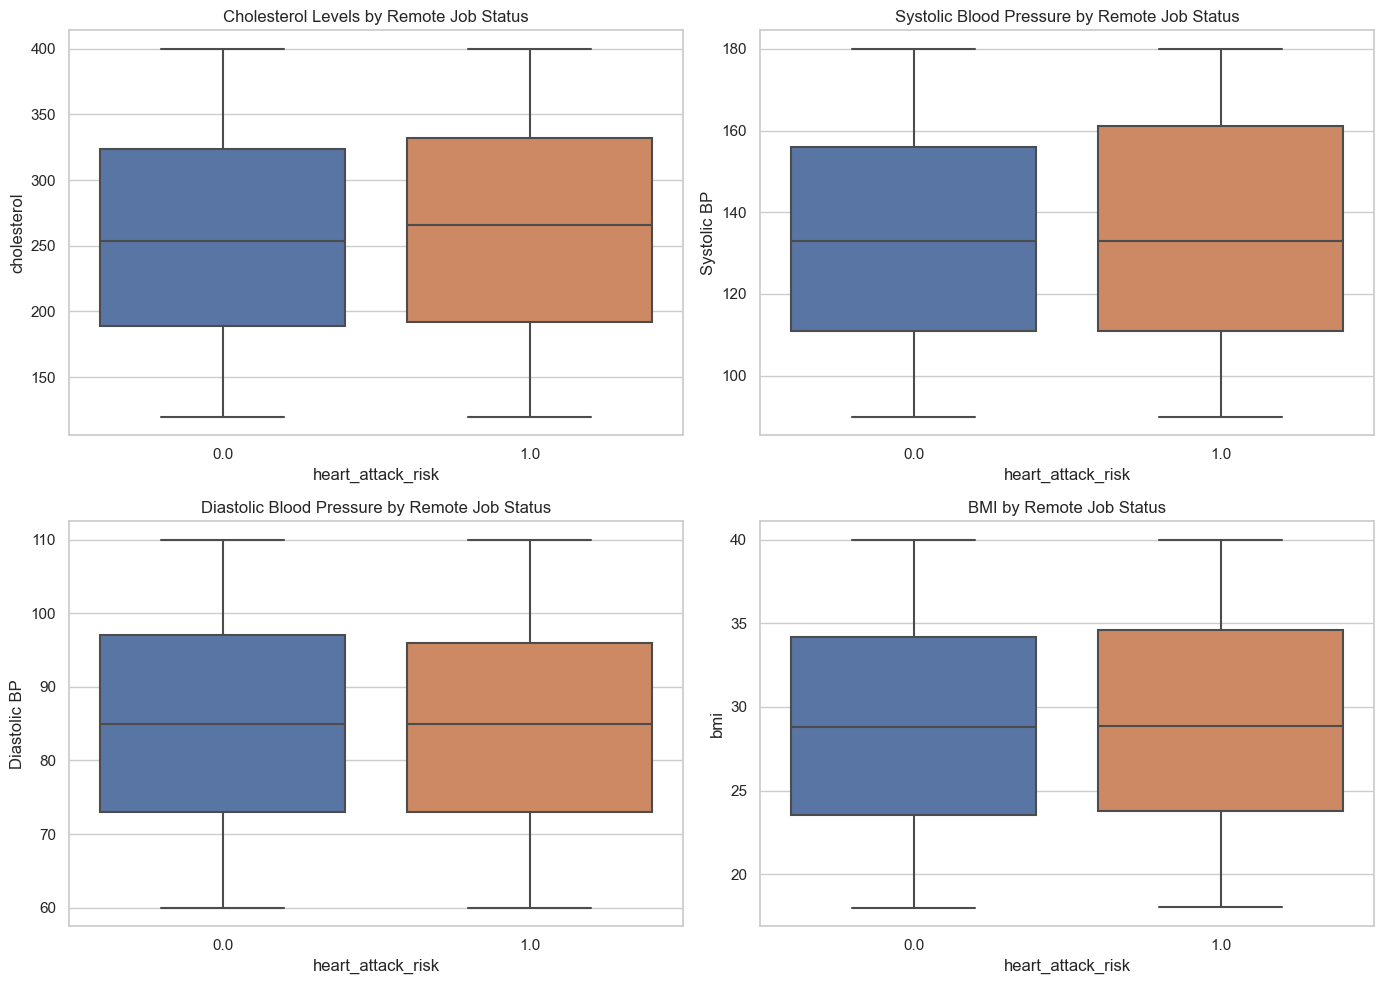

In [198]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Cholesterol levels
plt.subplot(2, 2, 1)
sns.boxplot(x='heart_attack_risk', y='cholesterol', data=df_clean1_heart_wlb)
plt.title('Cholesterol Levels by Remote Job Status')

# Systolic Blood Pressure
plt.subplot(2, 2, 2)
sns.boxplot(x='heart_attack_risk', y='Systolic BP', data=df_clean1_heart_wlb)
plt.title('Systolic Blood Pressure by Remote Job Status')

# Diastolic Blood Pressure
plt.subplot(2, 2, 3)
sns.boxplot(x='heart_attack_risk', y='Diastolic BP', data=df_clean1_heart_wlb)
plt.title('Diastolic Blood Pressure by Remote Job Status')

# BMI
plt.subplot(2, 2, 4)
sns.boxplot(x='heart_attack_risk', y='bmi', data=df_clean1_heart_wlb)
plt.title('BMI by Remote Job Status')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()




/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

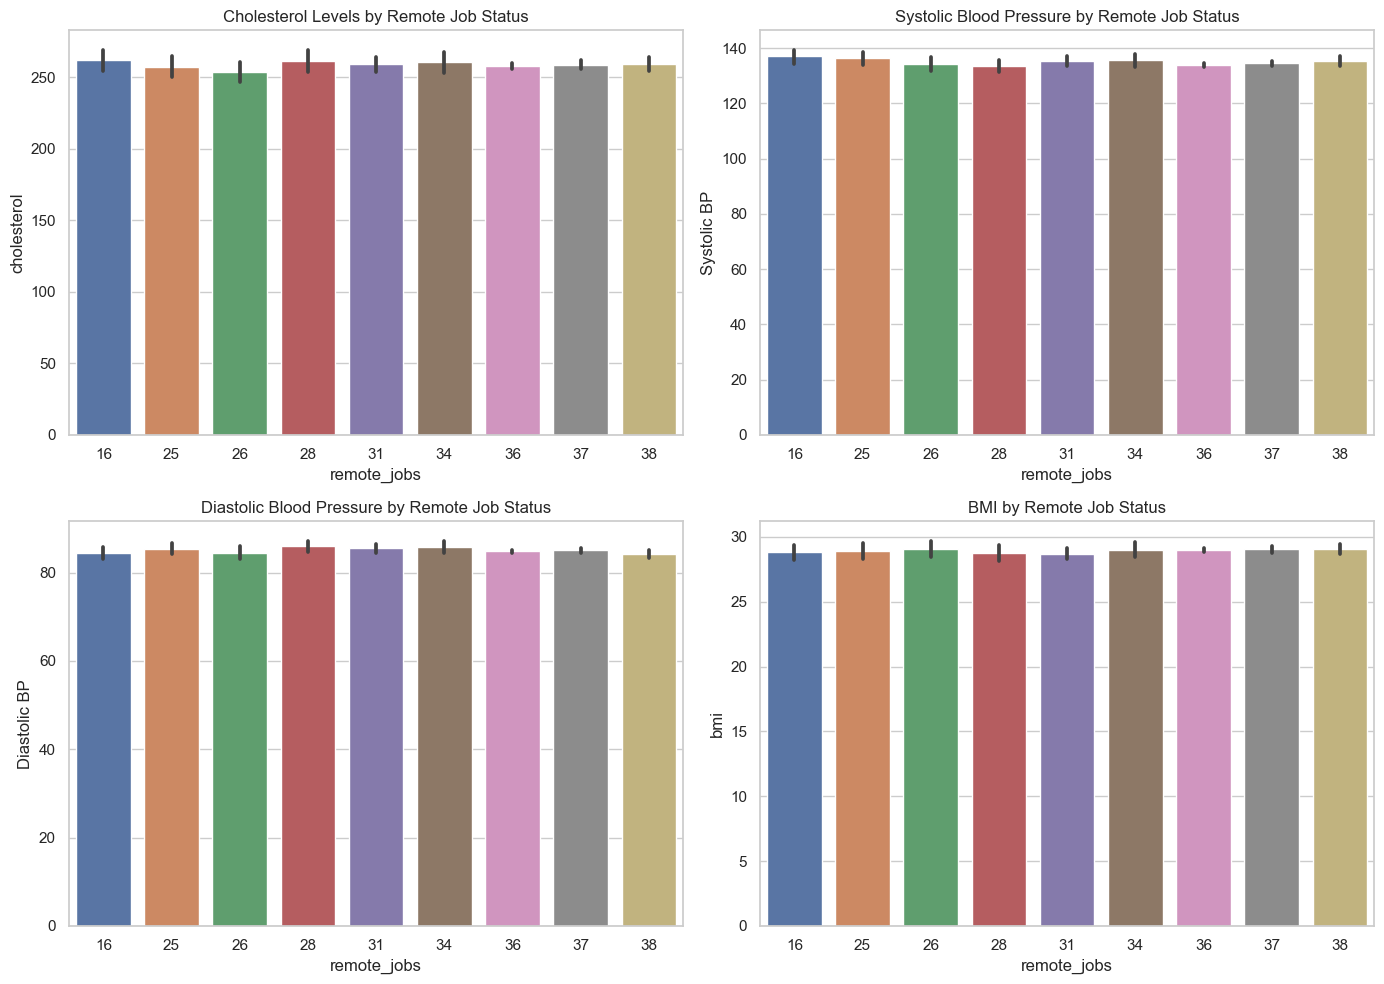

In [193]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Cholesterol levels
plt.subplot(2, 2, 1)
sns.barplot(x='remote_jobs', y='cholesterol', data=df_clean1_heart_wlb)
plt.title('Cholesterol Levels by Remote Job Status')

# Systolic Blood Pressure
plt.subplot(2, 2, 2)
sns.barplot(x='remote_jobs', y='Systolic BP', data=df_clean1_heart_wlb)
plt.title('Systolic Blood Pressure by Remote Job Status')

# Diastolic Blood Pressure
plt.subplot(2, 2, 3)
sns.barplot(x='remote_jobs', y='Diastolic BP', data=df_clean1_heart_wlb)
plt.title('Diastolic Blood Pressure by Remote Job Status')

# BMI
plt.subplot(2, 2, 4)
sns.barplot(x='remote_jobs', y='bmi', data=df_clean1_heart_wlb)
plt.title('BMI by Remote Job Status')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



In [207]:
df_clean1_heart_wlb.columns

Index(['age', 'sex', 'cholesterol', 'blood_pressure', 'heart_rate', 'diabetes',
       'family_history', 'smoking', 'obesity', 'alcohol_consumption',
       'exercise_hours_per_week', 'diet', 'previous_heart_problems',
       'medication_use', 'stress_level', 'sedentary_hours_per_day', 'income',
       'bmi', 'triglycerides', 'physical_activity_days_per_week',
       'sleep_hours_per_day', 'country', 'continent', 'hemisphere',
       'heart_attack_risk', 'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score',
       'Overworked Population (Normalized)',
       'Vacations Taken (Days

In [206]:
# Calculate Point-Biserial Correlation

import scipy.stats as stats
corr, p_value = stats.pointbiserialr(df_clean1_heart_wlb['age'], df_clean1_heart_wlb['heart_attack_risk'])
print(f"Point-Biserial Correlation: {corr}")
print(f"P-value: {p_value}")

Point-Biserial Correlation: -0.01254878584218119
P-value: 0.17375946245926882


sex_heart

In [209]:
contingency_table = pd.crosstab(df_clean1_heart_wlb['sex'], df_clean1_heart_wlb['heart_attack_risk'])
print(contingency_table)

heart_attack_risk   0.0   1.0
sex                          
Female             2320  1267
Male               5222  2942


In [210]:
from scipy.stats import chi2_contingency

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 0.5224072166967151
P-value: 0.46981663438198296


In [217]:
mean_heart_attack = df_clean1_heart_wlb.groupby('sex')['heart_attack_risk'].mean().reset_index()
print(mean_heart_attack)

      sex  heart_attack_risk
0  Female           0.353220
1    Male           0.360363


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

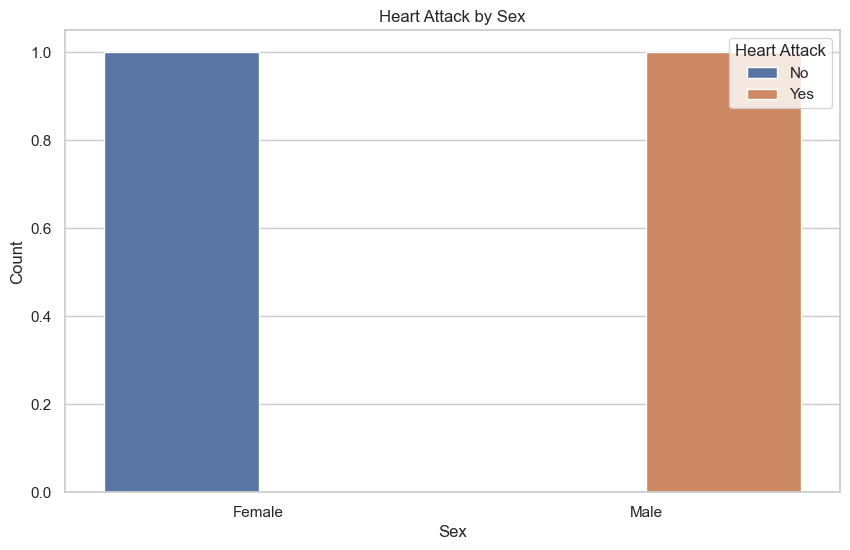

In [260]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='heart_attack_risk', data=mean_heart_attack)
plt.title('Heart Attack by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Heart Attack', loc='upper right', labels=['No', 'Yes'])
plt.show()

heart_covid_impact 

In [213]:
#Perform the T-Test

# Separate data into two groups
no_heart_attack = df_clean1_heart_wlb[df_clean1_heart_wlb['heart_attack_risk'] == 0]['covid_impact']
heart_attack = df_clean1_heart_wlb[df_clean1_heart_wlb['heart_attack_risk'] == 1]['covid_impact']

# Perform t-test
t_stat, p_value = ttest_ind(no_heart_attack, heart_attack)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: -1.150659912017282
P-Value: 0.24989559271543024


unemployee_heart

In [220]:
# Separate data into two groups
no_heart_attack = df_clean1_heart_wlb[df_clean1_heart_wlb['heart_attack_risk'] == 0]['unemployment']
heart_attack = df_clean1_heart_wlb[df_clean1_heart_wlb['heart_attack_risk'] == 1]['unemployment']

# Perform t-test
t_stat, p_value = ttest_ind(no_heart_attack, heart_attack)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: -1.1098275311023644
P-Value: 0.2670960675989601


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


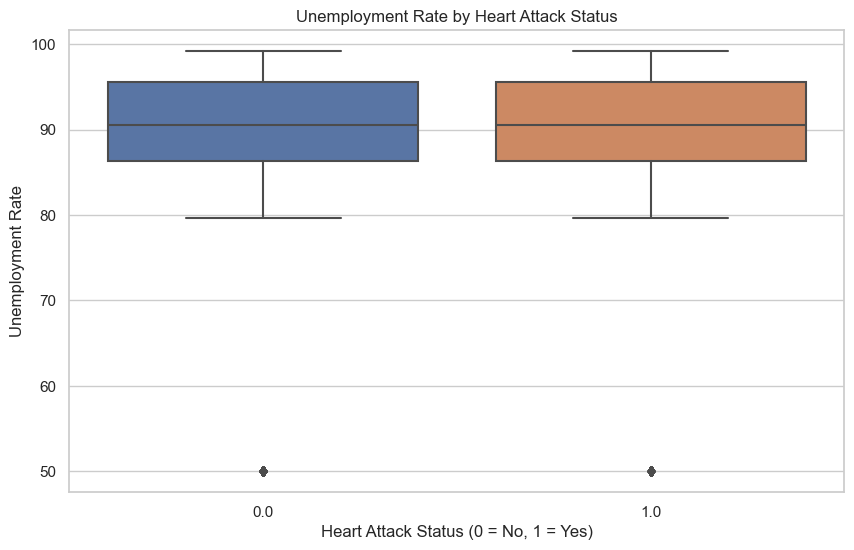

In [223]:
#no
plt.figure(figsize=(10, 6))
sns.boxplot(x='heart_attack_risk', y='unemployment', data=df_clean1_heart_wlb)
plt.title('Unemployment Rate by Heart Attack Status')
plt.xlabel('Heart Attack Status (0 = No, 1 = Yes)')
plt.ylabel('Unemployment Rate')
plt.show()

heart_access_to_mental_healthcare

In [225]:
mean_mental_health = df_clean1_heart_wlb['access_to_mental_healthcare'].mean()
print(f"Mean Mental Health Score: {mean_mental_health}")


Mean Mental Health Score: 77.91428814568974


In [228]:
# Separate data into two groups
no_heart_attack = df_clean1_heart_wlb[df_clean1_heart_wlb['heart_attack_risk'] == 0]['access_to_mental_healthcare']
heart_attack = df_clean1_heart_wlb[df_clean1_heart_wlb['heart_attack_risk'] == 1]['access_to_mental_healthcare']

# Perform t-test
t_stat, p_value = ttest_ind(no_heart_attack, heart_attack)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: -0.2865030155857499
P-Value: 0.7744979358598687


In [240]:
mean_values = df_clean1_heart_wlb.groupby('heart_attack_risk')['access_to_mental_healthcare'].mean().reset_index()
print(mean_values)

   heart_attack_risk  access_to_mental_healthcare
0                0.0                    77.894391
1                1.0                    77.949941


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


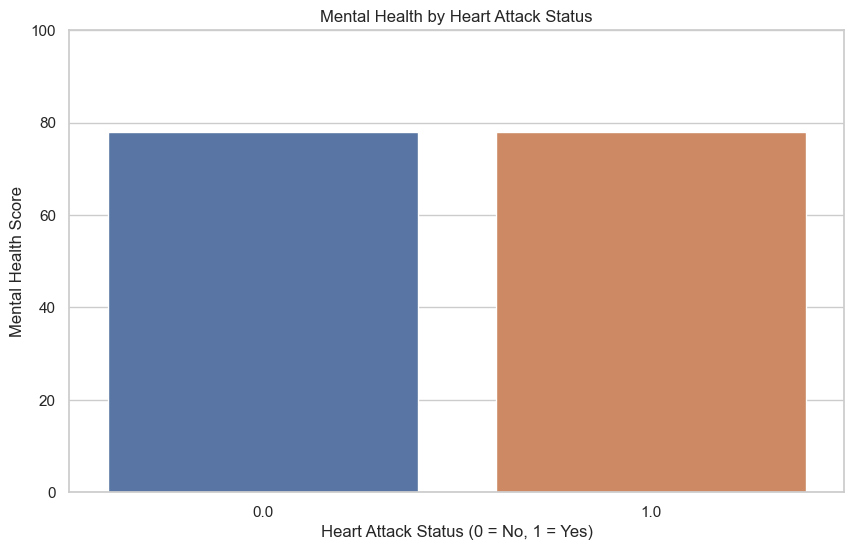

In [242]:
# Bar plot of Mental Health by Heart Attack Status
plt.figure(figsize=(10, 6))
sns.barplot(x='heart_attack_risk', y='access_to_mental_healthcare', data=mean_values)
plt.title('Mental Health by Heart Attack Status')
plt.xlabel('Heart Attack Status (0 = No, 1 = Yes)')
plt.ylabel('Mental Health Score')
plt.ylim(0, 100)  # Adjust the y-axis limit if necessary
plt.show()

In [235]:
df_clean1_heart_wlb.drop(columns=['Overworked Population (Normalized)','Vacations Taken (Days) (Normalized)','Work-Life Balance Score','Risk Prediction',
                            'Systolic BP','Diastolic BP','Predicted_Prob','blood_pressure','continent','hemisphere'],axis=1,inplace=True)

city_safety_hear_attack

In [237]:
# Separate data into two groups
no_heart_attack = df_clean1_heart_wlb[df_clean1_heart_wlb['heart_attack_risk'] == 0]['city_safety']
heart_attack = df_clean1_heart_wlb[df_clean1_heart_wlb['heart_attack_risk'] == 1]['city_safety']

# Perform t-test
t_stat, p_value = ttest_ind(no_heart_attack, heart_attack)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: -0.3700918519933275
P-Value: 0.7113207239290225


In [243]:
mean_city = df_clean1_heart_wlb.groupby('heart_attack_risk')['city_safety'].mean().reset_index()

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


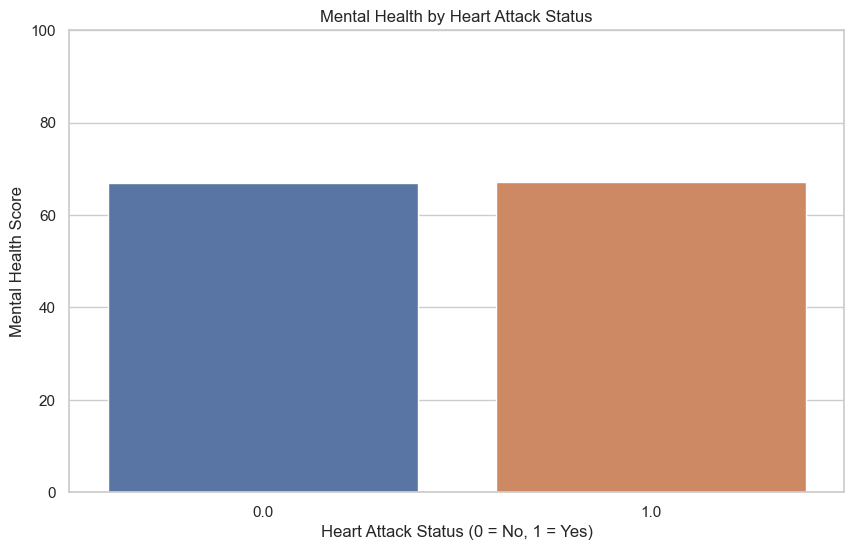

In [244]:
# Bar plot of Mental Health by Heart Attack Status
plt.figure(figsize=(10, 6))
sns.barplot(x='heart_attack_risk', y='city_safety', data=mean_city)
plt.title('Mental Health by Heart Attack Status')
plt.xlabel('Heart Attack Status (0 = No, 1 = Yes)')
plt.ylabel('Mental Health Score')
plt.ylim(0, 100)  # Adjust the y-axis limit if necessary
plt.show()

In [245]:
df_clean1_heart_wlb.columns

Index(['age', 'sex', 'cholesterol', 'heart_rate', 'diabetes', 'family_history',
       'smoking', 'obesity', 'alcohol_consumption', 'exercise_hours_per_week',
       'diet', 'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides',
       'physical_activity_days_per_week', 'sleep_hours_per_day', 'country',
       'heart_attack_risk', 'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score'],
      dtype='object')

total_score_heart

In [246]:
mean_total = df_clean1_heart_wlb.groupby('heart_attack_risk')['total_score'].mean().reset_index()

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


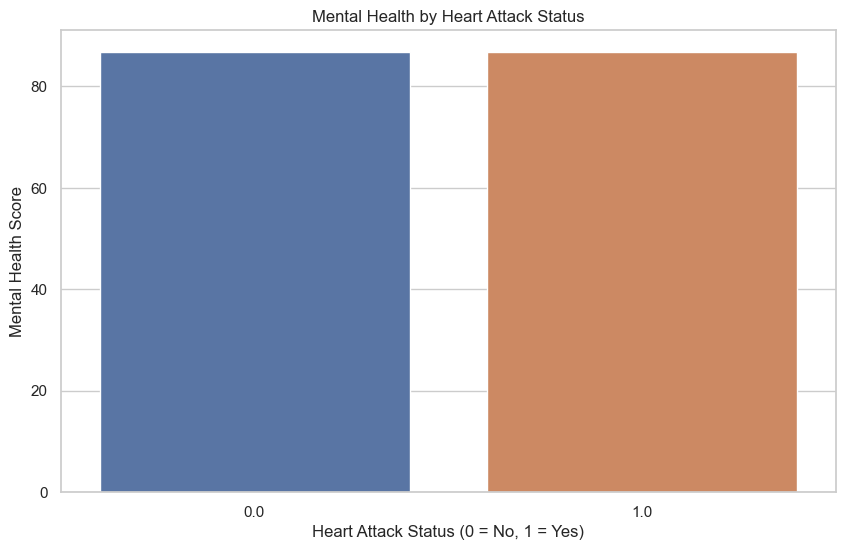

In [248]:
# Bar plot of Mental Health by Heart Attack Status
plt.figure(figsize=(10, 6))
sns.barplot(x='heart_attack_risk', y='total_score', data=mean_total)
plt.title('Mental Health by Heart Attack Status')
plt.xlabel('Heart Attack Status (0 = No, 1 = Yes)')
plt.ylabel('Mental Health Score')
plt.show()

wellness_and_fitness_heart

In [250]:
mean_wellness = df_clean1_heart_wlb.groupby('heart_attack_risk')['wellness_and_fitness'].mean().reset_index()

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


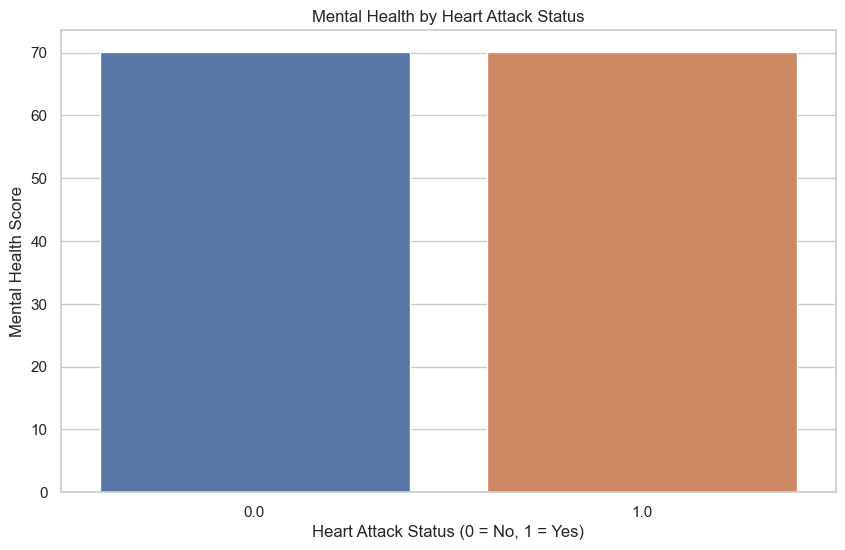

In [251]:
# Bar plot of Mental Health by Heart Attack Status
plt.figure(figsize=(10, 6))
sns.barplot(x='heart_attack_risk', y='wellness_and_fitness', data=mean_wellness)
plt.title('Mental Health by Heart Attack Status')
plt.xlabel('Heart Attack Status (0 = No, 1 = Yes)')
plt.ylabel('Mental Health Score')
plt.show()

main_hypothesis 

In [252]:
df_clean1_heart_wlb.columns

Index(['age', 'sex', 'cholesterol', 'heart_rate', 'diabetes', 'family_history',
       'smoking', 'obesity', 'alcohol_consumption', 'exercise_hours_per_week',
       'diet', 'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides',
       'physical_activity_days_per_week', 'sleep_hours_per_day', 'country',
       'heart_attack_risk', 'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score'],
      dtype='object')

In [253]:
import statsmodels.api as sm

# Prepare the data for logistic regression
X = df_clean1_heart_wlb['physical_activity_days_per_week']
y = df_clean1_heart_wlb['heart_attack_risk']

# Add a constant to the independent variable matrix
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.652351
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      heart_attack_risk   No. Observations:                11751
Model:                          Logit   Df Residuals:                    11749
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Jul 2024   Pseudo R-squ.:               2.132e-05
Time:                        11:39:14   Log-Likelihood:                -7665.8
converged:                       True   LL-Null:                       -7665.9
Covariance Type:            nonrobust   LLR p-value:                    0.5675
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.5665      0.035    -16.157  

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


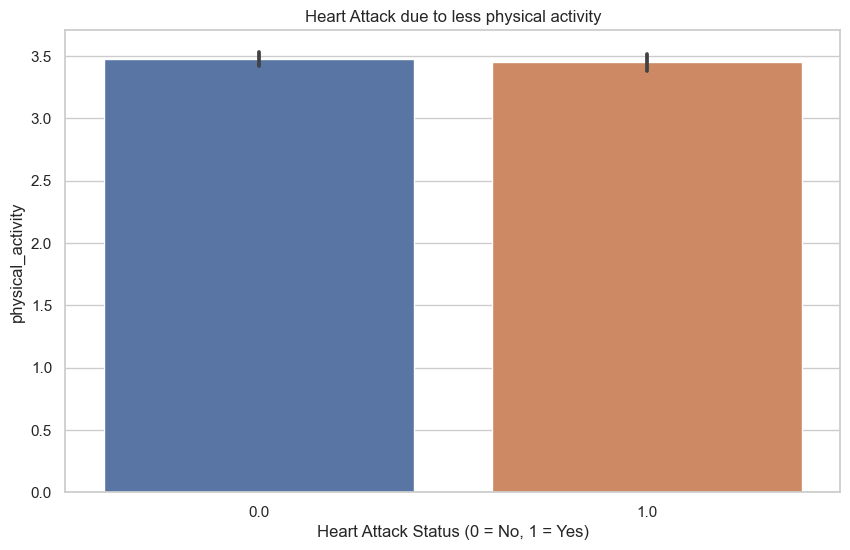

In [256]:
# Bar plot of Mental Health by Heart Attack Status
plt.figure(figsize=(10, 6))
sns.barplot(x='heart_attack_risk', y='physical_activity_days_per_week', data=df_clean1_heart_wlb)
plt.title( 'Heart Attack due to less physical activity')
plt.xlabel('Heart Attack Status (0 = No, 1 = Yes)')
plt.ylabel('physical_activity')
plt.show()

In [258]:
df_clean1_heart_wlb['heart_attack_risk'].value_counts()

heart_attack_risk
0.0    7542
1.0    4209
Name: count, dtype: int64